# Project : Bangladesh properties prices recommender

<span id="toc"></span>

## Table of Contents

<!-- 1. [Introduction](#intro)
1. [Modeling experiments](#modeling-experiments)
1. [Model optimization](#model-optimization)
1. [Conclusions](#conclusion) -->

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sb

from typing import List, Tuple

import sys

sys.path.append("../../../task-2-data-preprocessing/functions")
from cleaning_utilities import *

from functions.modeling_utilities import *

%matplotlib inline

In [2]:
# CSVs folder
merged_data_folder="../../../../data/Merged_Data"


In [3]:
# Load the merged dataset
original_df = pd.read_csv(f"{merged_data_folder}/cleaned_merged_datasets.csv")
original_df.head(2).T

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0  \
area                                                                              1185.0   
building_type                                                                  Apartment   
building_nature                                                              Residential   
image_url                              https://images-cdn.bproperty.com/thumbnails/15...   
num_bath_rooms                                                                       0.0   
num_bed_rooms                                                                        3.0   
price                                                                          6100000.0   
property_description                   Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...   
property_overview                      This flat consists of facilities you can think...   
property_url                           https://www.bproperty.com/en/property/details-...   
purpose                                                                             Sale   
city                                                                               Dhaka   
locality                                                                        Khilgaon   
address                                                                              NaN   
id                                                                           bproperty-0   
relaxation_amenity_count                                                               0   
security_amenity_count                                                                 1   
maintenance_or_cleaning_amenity_count                                                  2   
social_amenity_count                                                                   0   
expendable_amenity_count                                                               2   
service_staff_amenity_count                                                            0   
unclassify_amenity_count                                                               3   
division                                                                           Dhaka   
zone                                                                            Khilgaon   

                                                                                       1  
area                                                                              2464.0  
building_type                                                                  Apartment  
building_nature                                                              Residential  
image_url                              https://images-cdn.bproperty.com/thumbnails/15...  
num_bath_rooms                                                                       4.0  
num_bed_rooms                                                                        3.0  
price                                                                         28900000.0  
property_description                   A Vibrant 2464 Sq Ft Residential Flat For Sale...  
property_overview                      Ready to move in somewhere with everything nea...  
property_url                           https://www.bproperty.com/en/property/details-...  
purpose                                                                             Sale  
city                                                                               Dhaka  
locality                                                                       Dhanmondi  
address                                                                              NaN  
id                                                                           bproperty-1  
relaxation_amenity_count                                                               0  
security_amenity_count                                                                 2  
maintenance_or_cleaning_amenity_count                                                  0  
social_amenity_count                                     

In [4]:
# Making a copy of the dataset to work with, in order to have the original one available for other uses
df = original_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [6]:
# Check N/A values
df.isna().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

In [7]:
# Dropping columns with null values (division and zone are holding similar information to city and locality)

# df.drop(["image_url","property_description","property_overview","address","division","zone"], axis=1, inplace=True)

df.dropna(axis=1,inplace=True)
df.isna().sum()

area                                     0
building_type                            0
building_nature                          0
num_bath_rooms                           0
num_bed_rooms                            0
price                                    0
purpose                                  0
city                                     0
locality                                 0
id                                       0
relaxation_amenity_count                 0
security_amenity_count                   0
maintenance_or_cleaning_amenity_count    0
social_amenity_count                     0
expendable_amenity_count                 0
service_staff_amenity_count              0
unclassify_amenity_count                 0
dtype: int64

In [8]:
# Summary statistics
df.describe().T

count          mean           std  \
area                                   33701.0  3.249107e+03  1.220057e+05   
num_bath_rooms                         33701.0  1.680870e+00  1.635645e+00   
num_bed_rooms                          33701.0  2.318091e+00  1.837590e+00   
price                                  33701.0  1.070405e+09  1.318148e+11   
relaxation_amenity_count               33701.0  1.388683e-02  1.881900e-01   
security_amenity_count                 33701.0  4.964541e-01  7.477925e-01   
maintenance_or_cleaning_amenity_count  33701.0  7.805703e-01  1.009691e+00   
social_amenity_count                   33701.0  8.032403e-02  4.033820e-01   
expendable_amenity_count               33701.0  1.189015e+00  1.552733e+00   
service_staff_amenity_count            33701.0  2.127533e-02  2.341565e-01   
unclassify_amenity_count               33701.0  1.810747e+00  2.122586e+00   

                                       min      25%       50%        75%  \
area                                   0.0   1000.0    1350.0     2061.0   
num_bath_rooms                         0.0      0.0       2.0        3.0   
num_bed_rooms                          0.0      2.0       3.0        3.0   
price                                  0.0  25000.0  170000.0  6000000.0   
relaxation_amenity_count               0.0      0.0       0.0        0.0   
security_amenity_count                 0.0      0.0       0.0        1.0   
maintenance_or_cleaning_amenity_count  0.0      0.0       0.0        2.0   
social_amenity_count                   0.0      0.0       0.0        0.0   
expendable_amenity_count               0.0      0.0       0.0        2.0   
service_staff_amenity_count            0.0      0.0       0.0        0.0   
unclassify_amenity_count               0.0      0.0       1.0        3.0   

                                                max  
area                                   1.450147e+07  
num_bath_rooms                         5.000000e+01  
num_bed_rooms                          9.400000e+01  
price                                  2.400000e+13  
relaxation_amenity_count               5.000000e+00  
security_amenity_count                 5.000000e+00  
maintenance_or_cleaning_amenity_count  3.000000e+00  
social_amenity_count                   5.000000e+00  
expendable_amenity_count               6.000000e+00  
service_staff_amenity_count            4.000000e+00  
unclassify_amenity_count               1.800000e+01

In [9]:
# df.hist(figsize=[16,20]);

In [10]:
# Number of properties per city
properties_per_city = df["city"].value_counts()
properties_per_city

Dhaka               28681
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Khulna                 39
Mymensingh              8
Thakurgaon              8
Bogura                  8
Cumilla                 5
Narsingdi               4
Barguna                 4
Chittagong              4
Magura                  4
Manikganj               4
Chandpur                3
Kushtia                 3
Jashore                 3
Tangail                 2
Noakhali                2
Nilphamari              2
Brahmanbaria            2
Moulvibazar             2
Madaripur               2
Naogaon                 1
Jamalpur                1
Faridpur                1
Nawabganj               1
Shariatpur              1
Joypurhat               1
Kishoreganj             1
Habiganj                1
Lakshmipur              1
Gaibandha   

In [11]:
# Total number of properties in our dataset
total_properties = properties_per_city.sum()
total_properties

33701

In [12]:
# Proportion of properties in each city per city
properties_proportion_per_city = properties_per_city / total_properties
properties_proportion_per_city

Dhaka               0.851043
Chattogram          0.103291
Narayanganj City    0.013086
Barishal            0.010445
Gazipur             0.009584
Rangpur             0.002166
Dinajpur            0.001899
Sylhet              0.001691
Rajshahi            0.001662
Narayanganj         0.001454
Khulna              0.001157
Mymensingh          0.000237
Thakurgaon          0.000237
Bogura              0.000237
Cumilla             0.000148
Narsingdi           0.000119
Barguna             0.000119
Chittagong          0.000119
Magura              0.000119
Manikganj           0.000119
Chandpur            0.000089
Kushtia             0.000089
Jashore             0.000089
Tangail             0.000059
Noakhali            0.000059
Nilphamari          0.000059
Brahmanbaria        0.000059
Moulvibazar         0.000059
Madaripur           0.000059
Naogaon             0.000030
Jamalpur            0.000030
Faridpur            0.000030
Nawabganj           0.000030
Shariatpur          0.000030
Joypurhat     

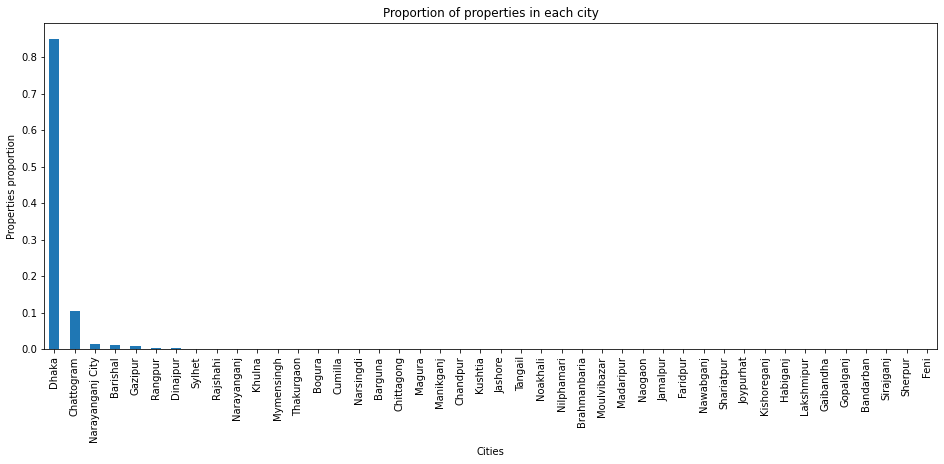

In [13]:
# Plotting the proportion of properties in each city
properties_proportion_per_city.plot(kind="bar", figsize=(16,6))

plt.xlabel("Cities")
plt.ylabel("Properties proportion")
plt.title("Proportion of properties in each city");

Our dataset is imbalanced toward `Dhaka` and `Chattogram`. So:
* We are going to combine all other cities in a generic `Others`. We will experiment on models with and without `Others` cities, and see which ones are performing better.
* `Chattogram` only amount to 10% of the total properties. We will select the same amount of proportion from `Dhaka` in order to have a more balanced dataset.

In [14]:
# Selecting cities with small number of properties count

proportion_lower_bound = 0.1

small_occurences = properties_proportion_per_city[ properties_proportion_per_city<proportion_lower_bound ].index.to_list()
small_occurences[:5]

['Narayanganj City', 'Barishal', 'Gazipur', 'Rangpur', 'Dinajpur']

In [15]:
# Combining small cities occurences into "Others"
df["city"] = df["city"].apply(lambda x: "Others" if x in small_occurences else x )

# Updating the number of properties per city
properties_per_city = df["city"].value_counts()
properties_per_city

Dhaka         28681
Chattogram     3481
Others         1539
Name: city, dtype: int64

In [16]:
# Updating the number of properties per city
properties_per_city = df["city"].value_counts()
properties_per_city

Dhaka         28681
Chattogram     3481
Others         1539
Name: city, dtype: int64

In [17]:
# Updating the proportion of properties in each city
properties_proportion_per_city = properties_per_city / total_properties
properties_proportion_per_city

Dhaka         0.851043
Chattogram    0.103291
Others        0.045666
Name: city, dtype: float64

The properties in cities other than `Dhaka` is less than 40% of the total dataset. So let's drop them.

In [18]:
# Dropping samples not in Dhaka
print(df.shape)
df =  df[ df["city"].isin(["Dhaka"])]# df[ df["city"] == "Dhaka"  ] ,"Chattogram"
print(df.shape)

(33701, 17)
(28681, 17)


In [19]:
# # Updating the number of properties per city
# properties_per_city = df["city"].value_counts()

# # Updating the proportion of properties in each city
# properties_proportion_per_city = properties_per_city / total_properties
# properties_proportion_per_city

We are going to drop samples in Dhaka city in order to make the data more balanced with Chattogram city.

In [20]:
# # Gettting the number of properties in Chattogram
# chattogram_properties_count = properties_per_city.loc["Chattogram"]
# chattogram_properties_count

In [21]:
# #Definig the number of properties we are going to select from Dhaka
# wanted_dhaka_properties_count = chattogram_properties_count+2000
# wanted_dhaka_properties_count

In [22]:
# df.head()

In [23]:
# # Properties repartition per purpose and city
# properties_count_per_purpose_and_city = df.groupby(["city","purpose"], as_index=False).count() \
#                                            .loc[:,["city","purpose","id"]] \
#                                             .rename(columns={
#     "id":"count"
# })
# properties_count_per_purpose_and_city

In [24]:
# df_stats = properties_count_per_purpose_and_city.copy()
# df_stats

In [25]:
# # Properties mean prices and mean areas per purpose and city
# properties_stats_per_purpose_and_city = df.groupby(["city","purpose"], as_index=False).mean() \
#                                            .loc[:,["city","purpose","price","area"]] \
#                                             .rename(columns={
#     "price":"mean_price",
#     "area":"mean_area"
# })
# properties_stats_per_purpose_and_city

In [26]:
# df_stats = pd.merge(df_stats,properties_stats_per_purpose_and_city, on=["city","purpose"],how="inner")
# df_stats

In [27]:
# # g = sb.FacetGrid(data = df_stats, col="purpose")
# # #g.map(plt.bar,"mean_price")
# # g.map(sb.barplot,"mean_price")

# plt.subplot(1,2,1)

# sb.barplot(data= df_stats[ df_stats["purpose"]=="Rent" ], x="city", y="mean_price")

# plt.subplot(1,2,2)

# sb.barplot(data= df_stats[ df_stats["purpose"]=="Sale" ], x="city", y="mean_price")

Rent and Sale prices are on different prices range. So we are going to separate the dataset in two based on rent/sale, remove outliers in each sub-dataset, then merge them into one.

In [28]:
# Separating the dataframe prices according to purpose
rent_df = df[df["purpose"]=="Rent"]
sale_df= df[df["purpose"]=="Sale"]

rent_df.shape, sale_df.shape

((18579, 17), (10102, 17))

In [29]:
# sale_df.to_csv("sale_df.csv", index=False)

### Dealing with outliers in `rent_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : num_bed_rooms
Processing column : price
Processing column : relaxation_amenity_count
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : social_amenity_count
Processing column : expendable_amenity_count
Processing column : service_staff_amenity_count
Processing column : unclassify_amenity_count


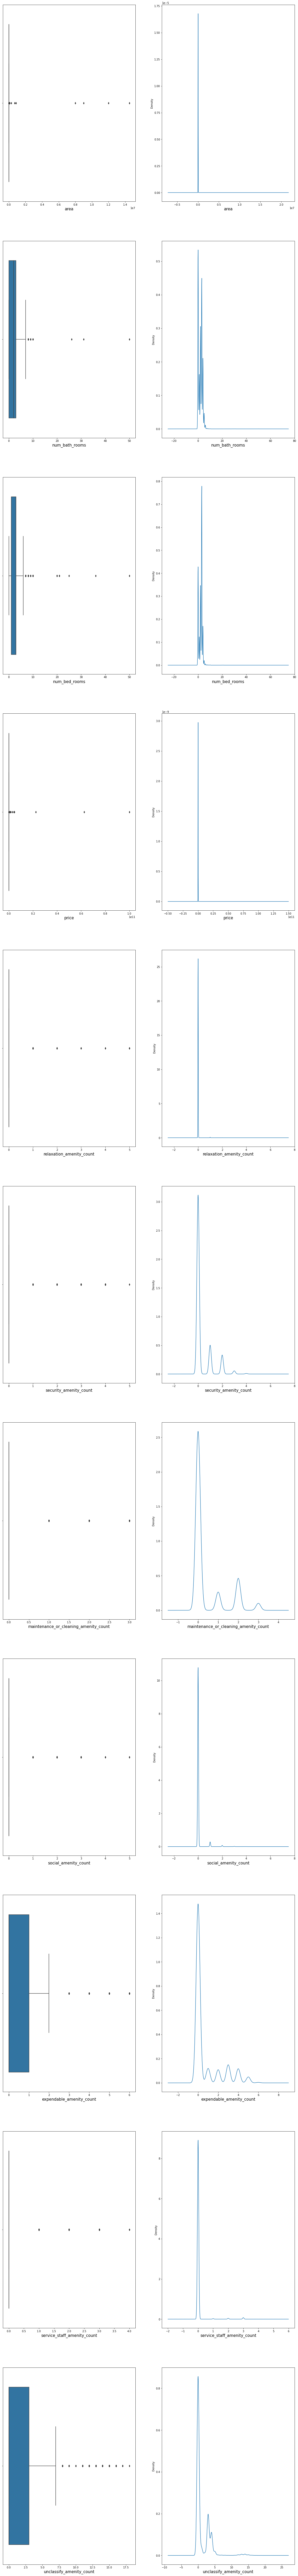

In [30]:
plot_distribution_in_features(df=rent_df)

In [31]:
# Removing outliers in df
remove_outliers_in_features(df=rent_df)

df.shape before outliers removal : (18579, 17)
Total number of outliers in data : 6986
df.shape after outliers removal : (11593, 17)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


area building_type building_nature  num_bath_rooms  num_bed_rooms  \
10935  1600.0        Office      Commercial             0.0            0.0   
10946  1600.0        Office      Commercial             0.0            0.0   
10949  1600.0        Office      Commercial             0.0            0.0   
10950  1500.0        Office      Commercial             0.0            0.0   
10951  1600.0        Office      Commercial             0.0            0.0   
...       ...           ...             ...             ...            ...   
33640  1230.0     Apartment     Residential             3.0            3.0   
33653     0.0     Apartment     Residential             2.0            2.0   
33654     0.0     Apartment     Residential             2.0            3.0   
33687  1150.0        Office      Commercial             0.0            0.0   
33694  4006.0        Office      Commercial             0.0            0.0   

         price purpose   city   locality               id  \
10935  45000.0    Rent  Dhaka      Badda  bproperty-10962   
10946  45000.0    Rent  Dhaka      Badda  bproperty-10973   
10949  45000.0    Rent  Dhaka      Badda  bproperty-10976   
10950  45000.0    Rent  Dhaka      Badda  bproperty-10977   
10951  45000.0    Rent  Dhaka      Badda  bproperty-10978   
...        ...     ...    ...        ...              ...   
33640      0.0    Rent  Dhaka     Mirpur    thetolet-2562   
33653      0.0    Rent  Dhaka     Mirpur    thetolet-2578   
33654      0.0    Rent  Dhaka     Mirpur    thetolet-2579   
33687  45000.0    Rent  Dhaka  Mohakhali        sharif-19   
33694    120.0    Rent  Dhaka     Uttara       sharif-231   

       relaxation_amenity_count  security_amenity_count  \
10935                         0                       0   
10946                         0                       0   
10949                         0                       0   
10950                         0                       0   
10951                         0                       0   
...                         ...                     ...   
33640                         0                       0   
33653                         0                       0   
33654                         0                       0   
33687                         0                       0   
33694                         0                       0   

       maintenance_or_cleaning_amenity_count  social_amenity_count  \
10935                                      0                     0   
10946                                      0                     0   
10949                                      0                     0   
10950                                      0                     0   
10951                                      0                     0   
...                                      ...                   ...   
33640                                      0                     0   
33653                                      0                     0   
33654                                      0                     0   
33687                                      0                     0   
33694                                      0                     0   

       expendable_amenity_count  service_staff_amenity_count  \
10935                         2                            0   
10946                         2                            0   
10949                         2                            0   
10950                         2                            0   
10951                         2                            0   
...                         ...                          ...   
33640                         0                            0   
33653                         0                            0   
33654                         0                            0   
33687                         0                            0   
33694                         0                            0   

       unclassify_am

In [32]:
drop_features_with_one_occurence(df=rent_df, features_to_ignore=["purpose"])

Shape before processing: (11593, 17)
Dropping feature city
Dropping feature relaxation_amenity_count
Dropping feature security_amenity_count
Dropping feature maintenance_or_cleaning_amenity_count
Dropping feature social_amenity_count
Dropping feature service_staff_amenity_count
Shape after processing: (11593, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


area building_type building_nature  num_bath_rooms  num_bed_rooms  \
10935  1600.0        Office      Commercial             0.0            0.0   
10946  1600.0        Office      Commercial             0.0            0.0   
10949  1600.0        Office      Commercial             0.0            0.0   
10950  1500.0        Office      Commercial             0.0            0.0   
10951  1600.0        Office      Commercial             0.0            0.0   
...       ...           ...             ...             ...            ...   
33640  1230.0     Apartment     Residential             3.0            3.0   
33653     0.0     Apartment     Residential             2.0            2.0   
33654     0.0     Apartment     Residential             2.0            3.0   
33687  1150.0        Office      Commercial             0.0            0.0   
33694  4006.0        Office      Commercial             0.0            0.0   

         price purpose   locality               id  expendable_amenity_count  \
10935  45000.0    Rent      Badda  bproperty-10962                         2   
10946  45000.0    Rent      Badda  bproperty-10973                         2   
10949  45000.0    Rent      Badda  bproperty-10976                         2   
10950  45000.0    Rent      Badda  bproperty-10977                         2   
10951  45000.0    Rent      Badda  bproperty-10978                         2   
...        ...     ...        ...              ...                       ...   
33640      0.0    Rent     Mirpur    thetolet-2562                         0   
33653      0.0    Rent     Mirpur    thetolet-2578                         0   
33654      0.0    Rent     Mirpur    thetolet-2579                         0   
33687  45000.0    Rent  Mohakhali        sharif-19                         0   
33694    120.0    Rent     Uttara       sharif-231                         0   

       unclassify_amenity_count  
10935                         3  
10946                         3  
10949                         3  
10950                         3  
10951                         3  
...                         ...  
33640                         1  
33653                         0  
33654                         0  
33687                         0  
33694                         0  

[11593 rows x 11 columns]

Processing column : area
Processing column : num_bath_rooms
Processing column : num_bed_rooms
Processing column : price
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


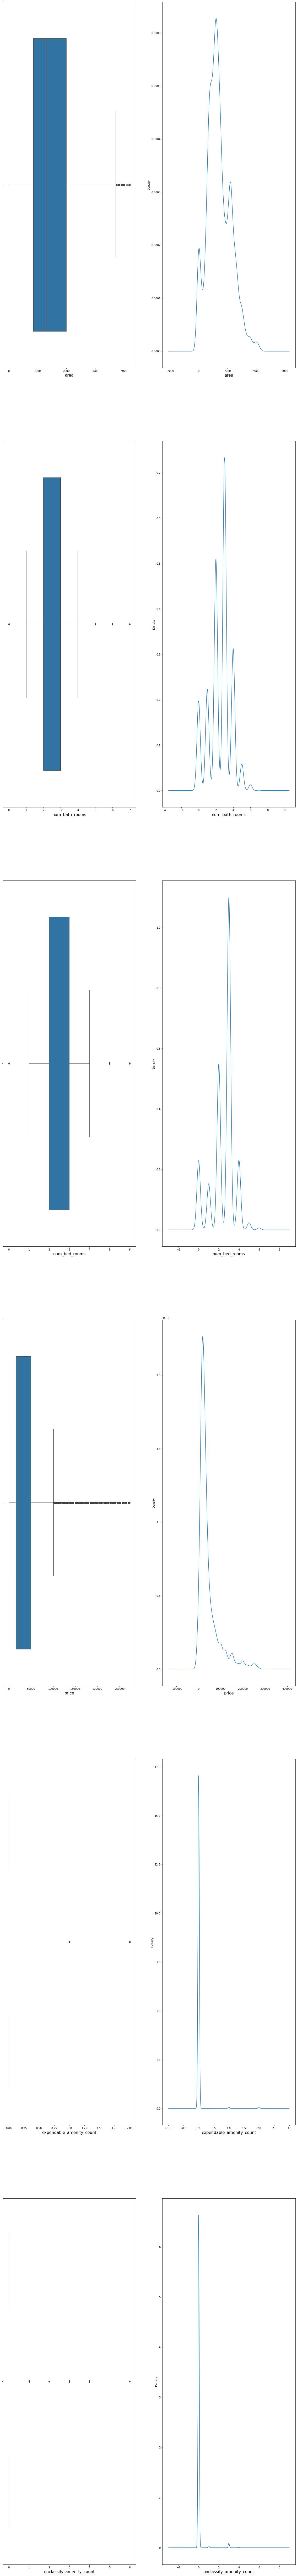

In [33]:
plot_distribution_in_features(df=rent_df)

### Manually removing outliers in `rent_df.price`

In [34]:
column="price"

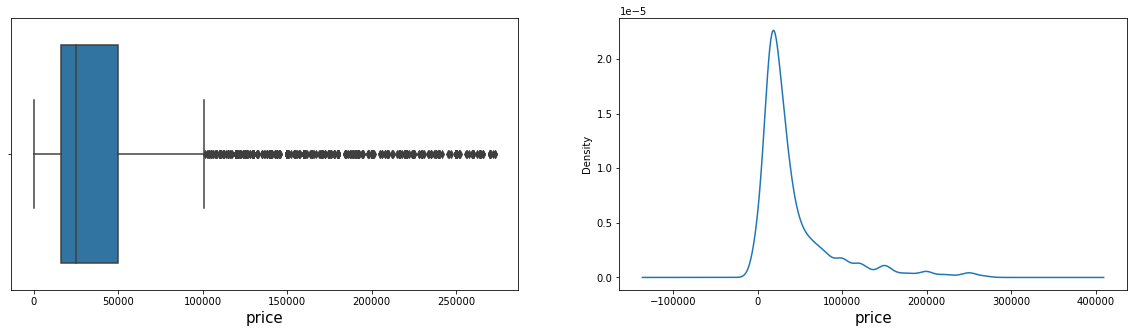

In [35]:
plot_distribution_in_feature(df=rent_df, feature=column)

In [36]:
upper_bound_value= 55000 #65000

In [37]:
print(sorted(set(rent_df[ rent_df[column] > upper_bound_value ][column].to_list())))

[55250.0, 56000.0, 57000.0, 57200.0, 57500.0, 58000.0, 59560.0, 59800.0, 60000.0, 62000.0, 62550.0, 63000.0, 63600.0, 64000.0, 64500.0, 64960.0, 65000.0, 65500.0, 65600.0, 66000.0, 66180.0, 67380.0, 67500.0, 68000.0, 69000.0, 69300.0, 69990.0, 70000.0, 70300.0, 70500.0, 72000.0, 72450.0, 72500.0, 73100.0, 75000.0, 76000.0, 76570.0, 77000.0, 77500.0, 79920.0, 80000.0, 80400.0, 81000.0, 83040.0, 84000.0, 85000.0, 85500.0, 87500.0, 88000.0, 88200.0, 90000.0, 90675.0, 91000.0, 91845.0, 92960.0, 93740.0, 95000.0, 96000.0, 96720.0, 98400.0, 99000.0, 99750.0, 100000.0, 100020.0, 100750.0, 100800.0, 101250.0, 102550.0, 103050.0, 103460.0, 104000.0, 105000.0, 106200.0, 107040.0, 108000.0, 108500.0, 110000.0, 110100.0, 110250.0, 112000.0, 112500.0, 114080.0, 115000.0, 116000.0, 116550.0, 117400.0, 119850.0, 119999.25, 120000.0, 121000.0, 121500.0, 122000.0, 122200.0, 122625.0, 123800.0, 124000.0, 125000.0, 125645.0, 126000.0, 126120.0, 126810.0, 128000.0, 129998.0, 129999.6, 130000.0, 132000.0, 

df.shape before outliers removal : (8933, 11)
Total number of outliers in data : 1
df.shape after outliers removal : (8932, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


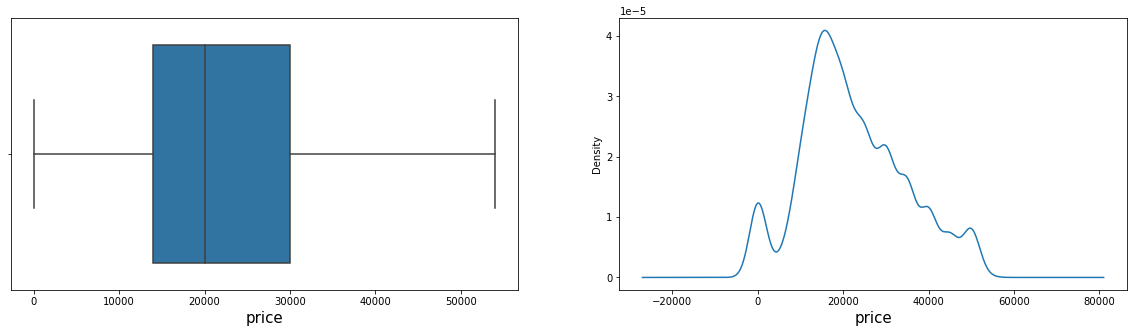

In [38]:
new_df = remove_upper_bound_outliers_in_feature(df=rent_df,feature=column, upper_bound=upper_bound_value)

In [39]:
print(rent_df.shape)
rent_df = new_df
print(rent_df.shape)

(11593, 11)
(8932, 11)


### Checking outliers presence in all features `rent_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : num_bed_rooms
Processing column : price
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


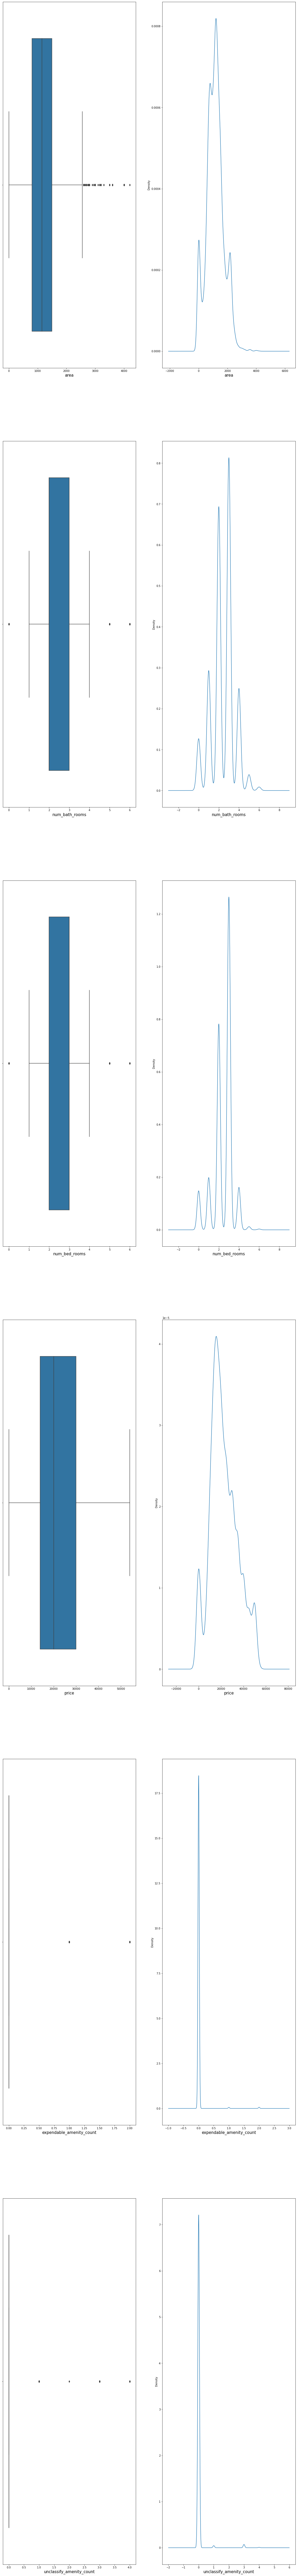

In [40]:
plot_distribution_in_features(df=rent_df)

### Manually removing outliers in `rent_df.area`

In [41]:
column="area"

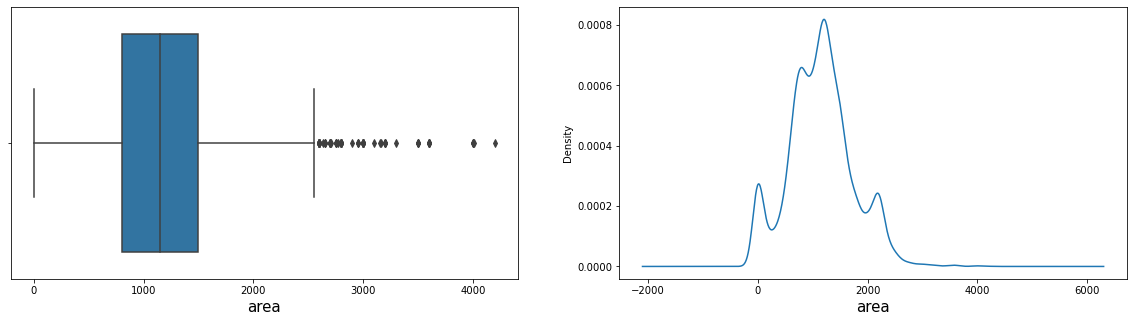

In [42]:
plot_distribution_in_feature(df=rent_df, feature=column)

In [43]:
upper_bound_value= 2550

In [44]:
print(sorted(set(rent_df[ rent_df[column] > upper_bound_value ][column].to_list())))

[2600.0, 2632.0, 2650.0, 2700.0, 2705.0, 2750.0, 2775.0, 2800.0, 2900.0, 2950.0, 2955.0, 3000.0, 3100.0, 3150.0, 3160.0, 3200.0, 3300.0, 3500.0, 3600.0, 4000.0, 4006.0, 4200.0]


df.shape before outliers removal : (8850, 11)
Total number of outliers in data : 43
df.shape after outliers removal : (8807, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


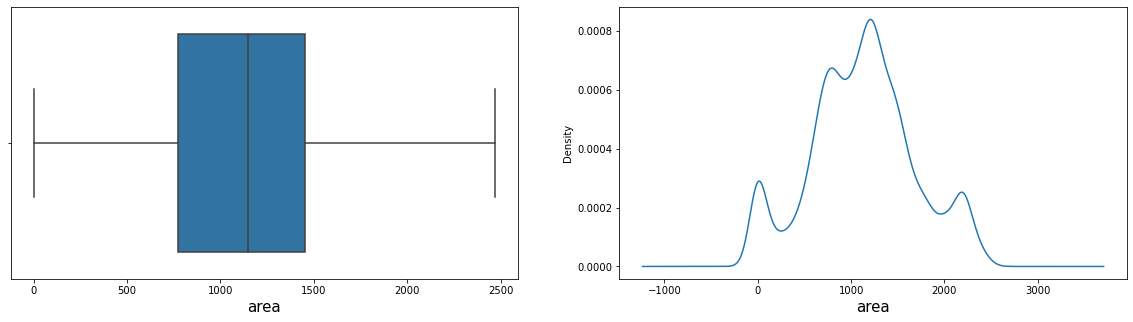

In [45]:
new_df = remove_upper_bound_outliers_in_feature(df=rent_df,feature=column, upper_bound=upper_bound_value)

In [46]:
print(rent_df.shape)
rent_df = new_df
print(rent_df.shape)

(8932, 11)
(8807, 11)


### Checking outliers presence in all features `rent_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : num_bed_rooms
Processing column : price
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


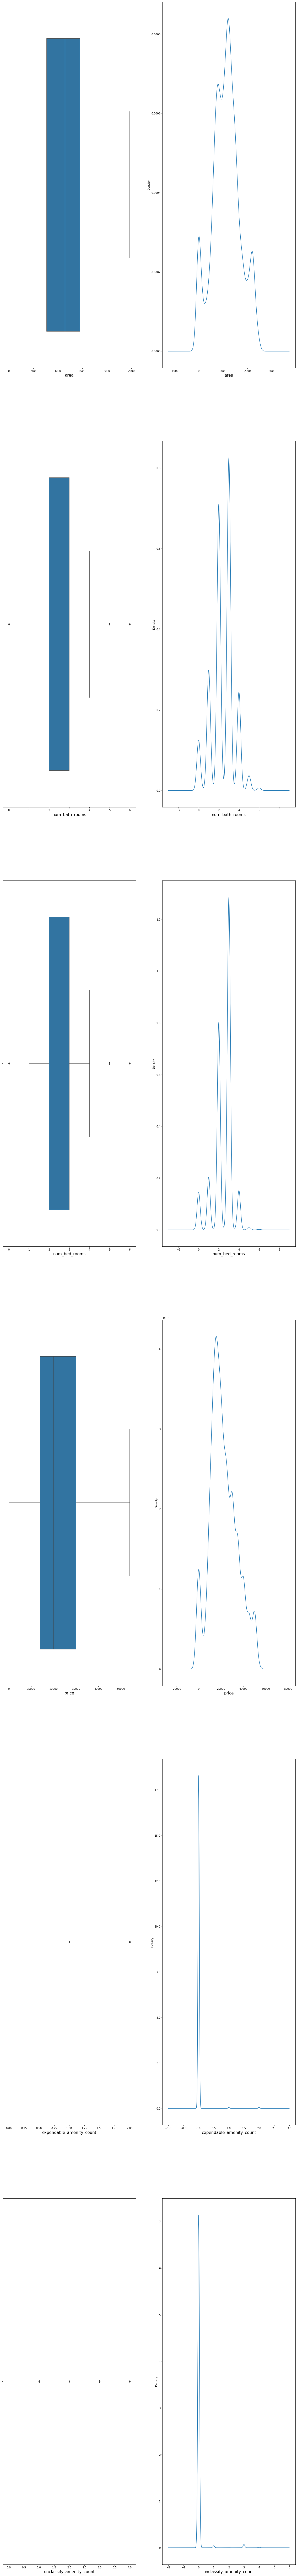

In [47]:
plot_distribution_in_features(df=rent_df)

### Manually removing outliers in `rent_df.num_bath_rooms`

In [48]:
column="num_bath_rooms"

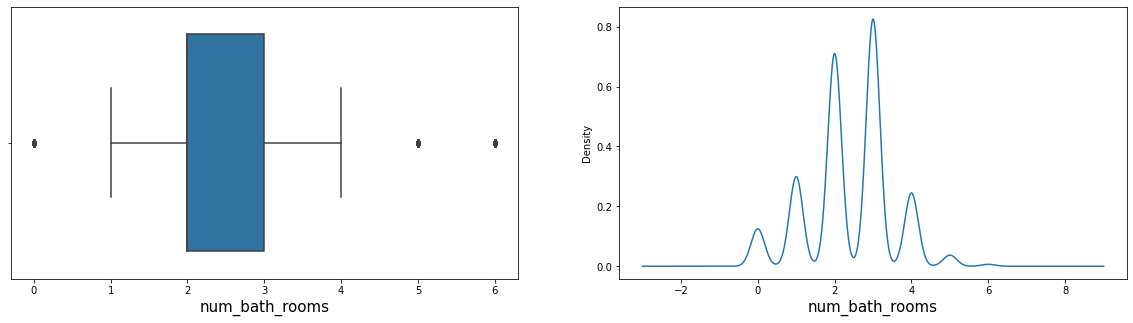

In [49]:
plot_distribution_in_feature(df=rent_df, feature=column)

In [50]:
upper_bound_value= 5

In [51]:
print(sorted(set(rent_df[ rent_df[column] > upper_bound_value ][column].to_list())))

[6.0]


df.shape before outliers removal : (8637, 11)
Total number of outliers in data : 490
df.shape after outliers removal : (8147, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


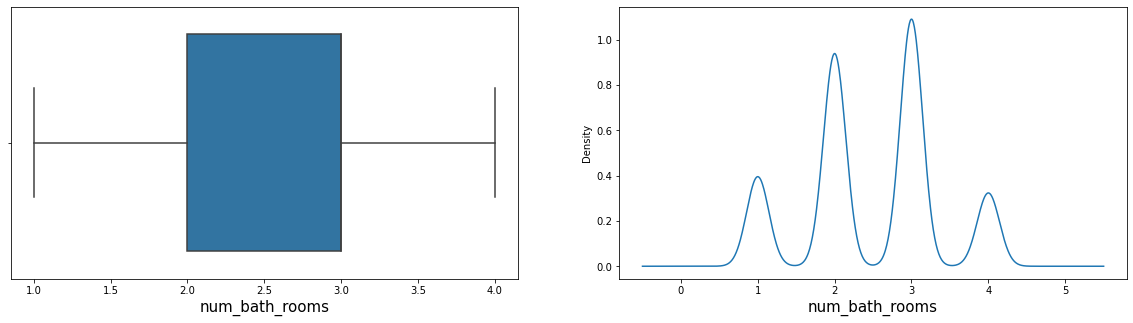

In [52]:
new_df = remove_upper_bound_outliers_in_feature(df=rent_df,feature=column, upper_bound=upper_bound_value)

In [53]:
print(rent_df.shape)
rent_df = new_df
print(rent_df.shape)

(8807, 11)
(8147, 11)


### Checking outliers presence in all features `rent_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : num_bed_rooms
Processing column : price
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


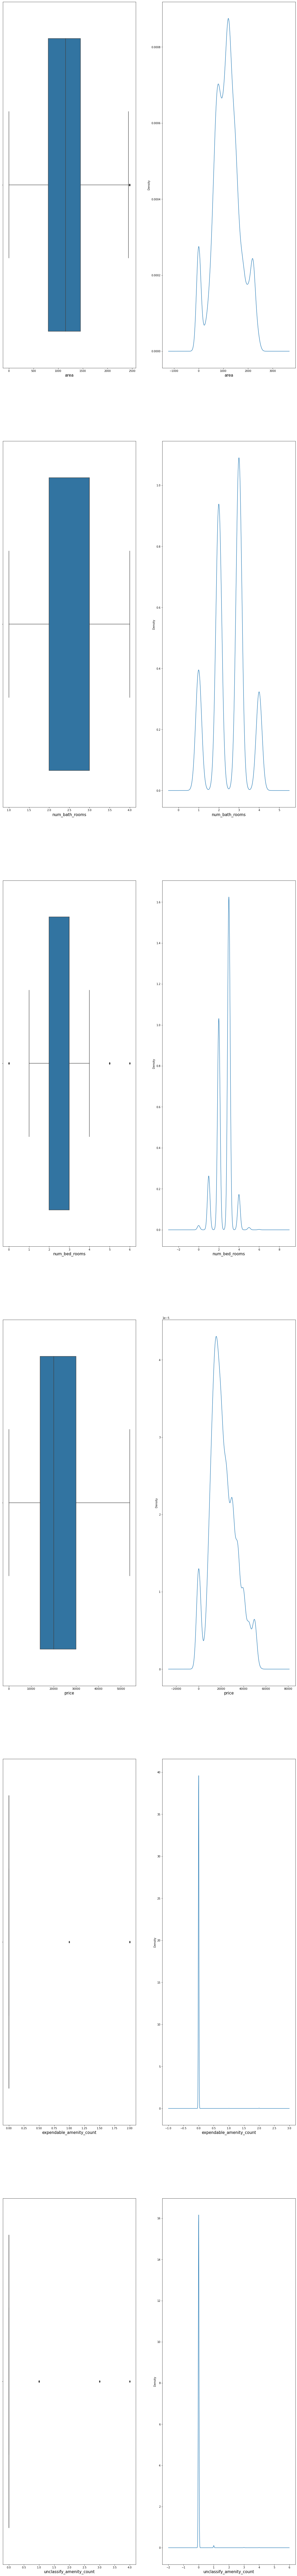

In [54]:
plot_distribution_in_features(df=rent_df)

### Manually removing outliers in `rent_df.num_bed_rooms`

In [55]:
column="num_bed_rooms"

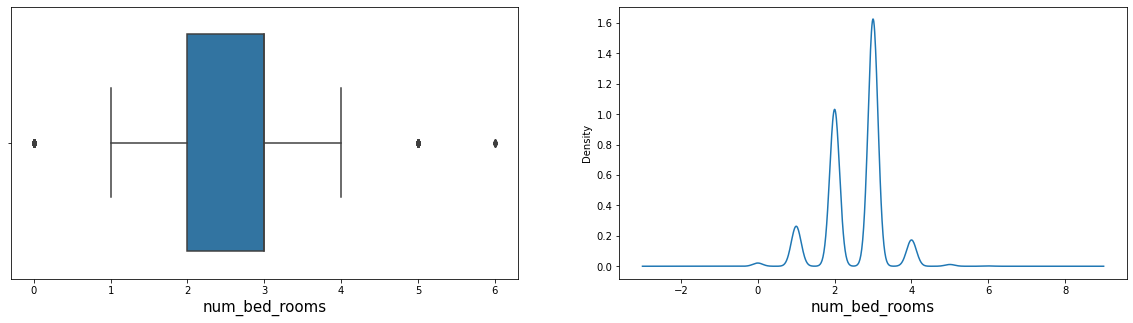

In [56]:
plot_distribution_in_feature(df=rent_df, feature=column)

In [57]:
upper_bound_value= 5

In [58]:
print(sorted(set(rent_df[ rent_df[column] > upper_bound_value ][column].to_list())))

[6.0]


df.shape before outliers removal : (8112, 11)
Total number of outliers in data : 55
df.shape after outliers removal : (8057, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


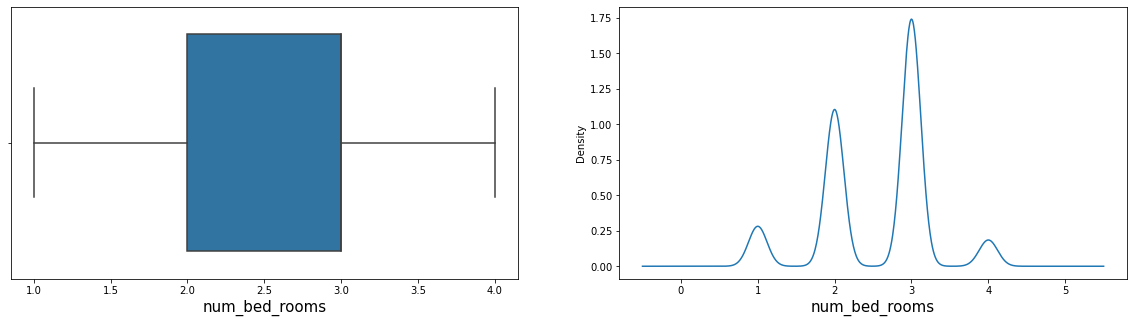

In [59]:
new_df = remove_upper_bound_outliers_in_feature(df=rent_df,feature=column, upper_bound=upper_bound_value)

In [60]:
print(rent_df.shape)
rent_df = new_df
print(rent_df.shape)

(8147, 11)
(8057, 11)


### Checking outliers presence in all features `rent_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : num_bed_rooms
Processing column : price
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


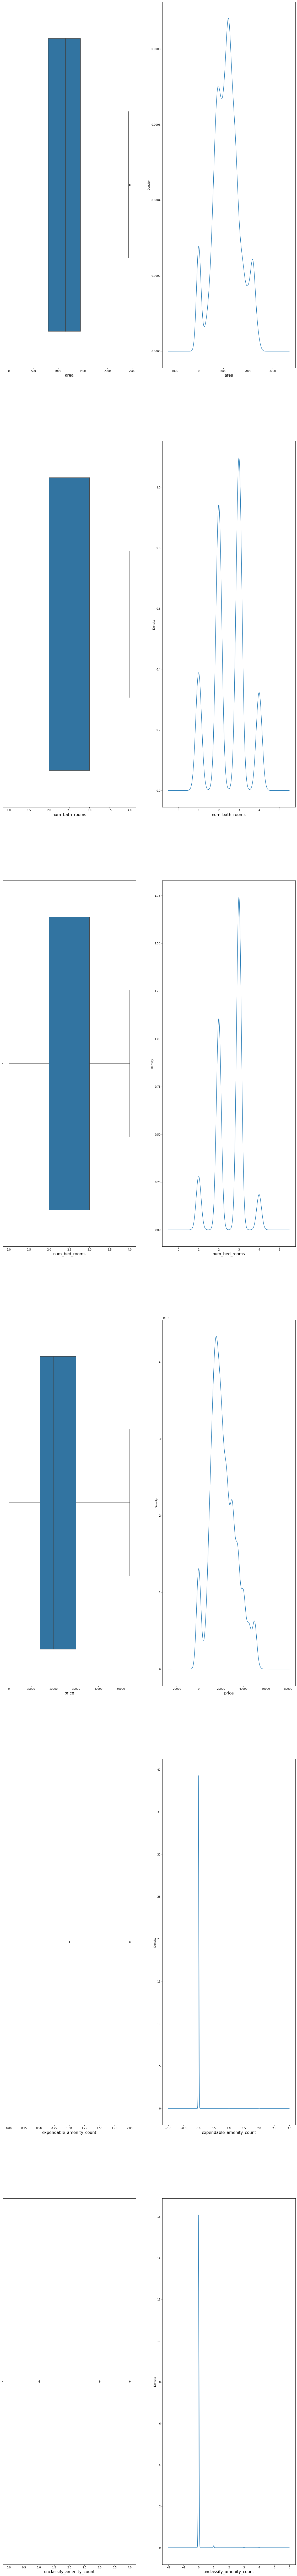

In [61]:
plot_distribution_in_features(df=rent_df)

The outliers in `rent_df` are dealed with. Let's move to `sale_df`.

### Dealing with outliers in `sale_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : num_bed_rooms
Processing column : price
Processing column : relaxation_amenity_count
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : social_amenity_count
Processing column : expendable_amenity_count
Processing column : service_staff_amenity_count
Processing column : unclassify_amenity_count


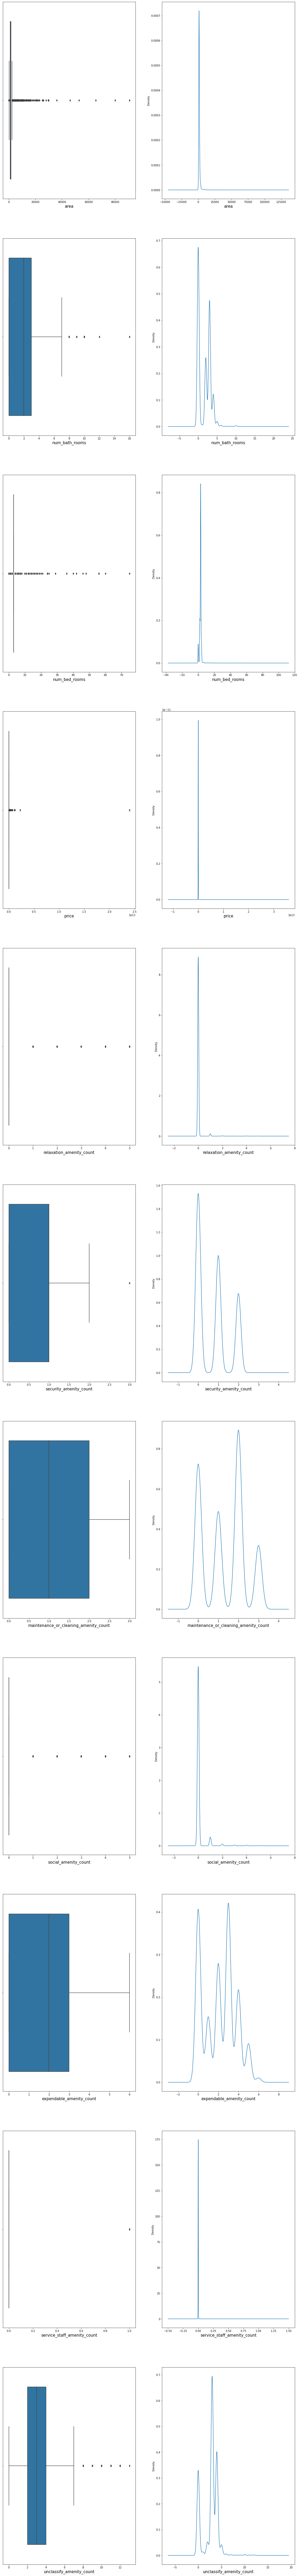

In [62]:
plot_distribution_in_features(df=sale_df)

In [63]:
# Removing outliers in sale_df
remove_outliers_in_features(df=sale_df)

df.shape before outliers removal : (10102, 17)
Total number of outliers in data : 4165
df.shape after outliers removal : (5937, 17)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


area building_type building_nature  num_bath_rooms  num_bed_rooms  \
0      1185.0     Apartment     Residential             0.0            3.0   
2      1140.0     Apartment     Residential             0.0            3.0   
3      1920.0     Apartment     Residential             3.0            3.0   
4      1445.0     Apartment     Residential             3.0            3.0   
7      1475.0     Apartment     Residential             3.0            3.0   
...       ...           ...             ...             ...            ...   
32194  1450.0     Apartment     Residential             3.0            3.0   
32195  1520.0     Apartment     Residential             3.0            3.0   
32202  1350.0        Others     Residential             3.0            3.0   
32279  1250.0     Apartment     Residential             3.0            3.0   
32300  1484.0     Apartment     Residential             3.0            3.0   

            price purpose   city         locality             id  \
0       6100000.0    Sale  Dhaka         Khilgaon    bproperty-0   
2       7500000.0    Sale  Dhaka           Mirpur    bproperty-2   
3      20000000.0    Sale  Dhaka  Bashundhara R-A    bproperty-3   
4      10800000.0    Sale  Dhaka         Banasree    bproperty-4   
7      10500000.0    Sale  Dhaka           Uttara    bproperty-7   
...           ...     ...    ...              ...            ...   
32194  13100000.0    Sale  Dhaka       Cantonment  bdhousing-260   
32195   9880000.0    Sale  Dhaka         Banasree  bdhousing-266   
32202   3820000.0    Sale  Dhaka       Uttar Khan  bdhousing-286   
32279   9675000.0    Sale  Dhaka           Kafrul  bdhousing-398   
32300  12200000.0    Sale  Dhaka           Uttara  bdhousing-447   

       relaxation_amenity_count  security_amenity_count  \
0                             0                       1   
2                             0                       2   
3                             0                       1   
4                             0                       0   
7                             0                       2   
...                         ...                     ...   
32194                         0                       1   
32195                         0                       0   
32202                         0                       1   
32279                         0                       1   
32300                         0                       0   

       maintenance_or_cleaning_amenity_count  social_amenity_count  \
0                                          2                     0   
2                                          2                     0   
3                                          2                     0   
4                                          2                     0   
7                                          3                     0   
...                                      ...                   ...   
32194                                      0                     0   
32195                                      0                     0   
32202                                      0                     0   
32279                                      0                     0   
32300                                      0                     0   

       expendable_amenity_count  service_staff_amenity_count  \
0                             2                            0   
2                             2                            0   
3                             3                            0   
4                             1                            0   
7                             3                            0   
...                         ...                          ...   
32194                         0                            0   
32195                         0                            0   
32202                         0                            0   
32279                         0                            0   
3

In [64]:
drop_features_with_one_occurence(df=sale_df, features_to_ignore=["purpose"])

Shape before processing: (5937, 17)
Dropping feature building_nature
Dropping feature num_bed_rooms
Dropping feature city
Dropping feature relaxation_amenity_count
Dropping feature social_amenity_count
Dropping feature service_staff_amenity_count
Shape after processing: (5937, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


area building_type  num_bath_rooms       price purpose  \
0      1185.0     Apartment             0.0   6100000.0    Sale   
2      1140.0     Apartment             0.0   7500000.0    Sale   
3      1920.0     Apartment             3.0  20000000.0    Sale   
4      1445.0     Apartment             3.0  10800000.0    Sale   
7      1475.0     Apartment             3.0  10500000.0    Sale   
...       ...           ...             ...         ...     ...   
32194  1450.0     Apartment             3.0  13100000.0    Sale   
32195  1520.0     Apartment             3.0   9880000.0    Sale   
32202  1350.0        Others             3.0   3820000.0    Sale   
32279  1250.0     Apartment             3.0   9675000.0    Sale   
32300  1484.0     Apartment             3.0  12200000.0    Sale   

              locality             id  security_amenity_count  \
0             Khilgaon    bproperty-0                       1   
2               Mirpur    bproperty-2                       2   
3      Bashundhara R-A    bproperty-3                       1   
4             Banasree    bproperty-4                       0   
7               Uttara    bproperty-7                       2   
...                ...            ...                     ...   
32194       Cantonment  bdhousing-260                       1   
32195         Banasree  bdhousing-266                       0   
32202       Uttar Khan  bdhousing-286                       1   
32279           Kafrul  bdhousing-398                       1   
32300           Uttara  bdhousing-447                       0   

       maintenance_or_cleaning_amenity_count  expendable_amenity_count  \
0                                          2                         2   
2                                          2                         2   
3                                          2                         3   
4                                          2                         1   
7                                          3                         3   
...                                      ...                       ...   
32194                                      0                         0   
32195                                      0                         0   
32202                                      0                         0   
32279                                      0                         0   
32300                                      0                         0   

       unclassify_amenity_count  
0                             3  
2                             4  
3                             3  
4                             4  
7                             4  
...                         ...  
32194                         1  
32195                         0  
32202                         1  
32279                         1  
32300                         1  

[5937 rows x 11 columns]

Processing column : area
Processing column : num_bath_rooms
Processing column : price
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


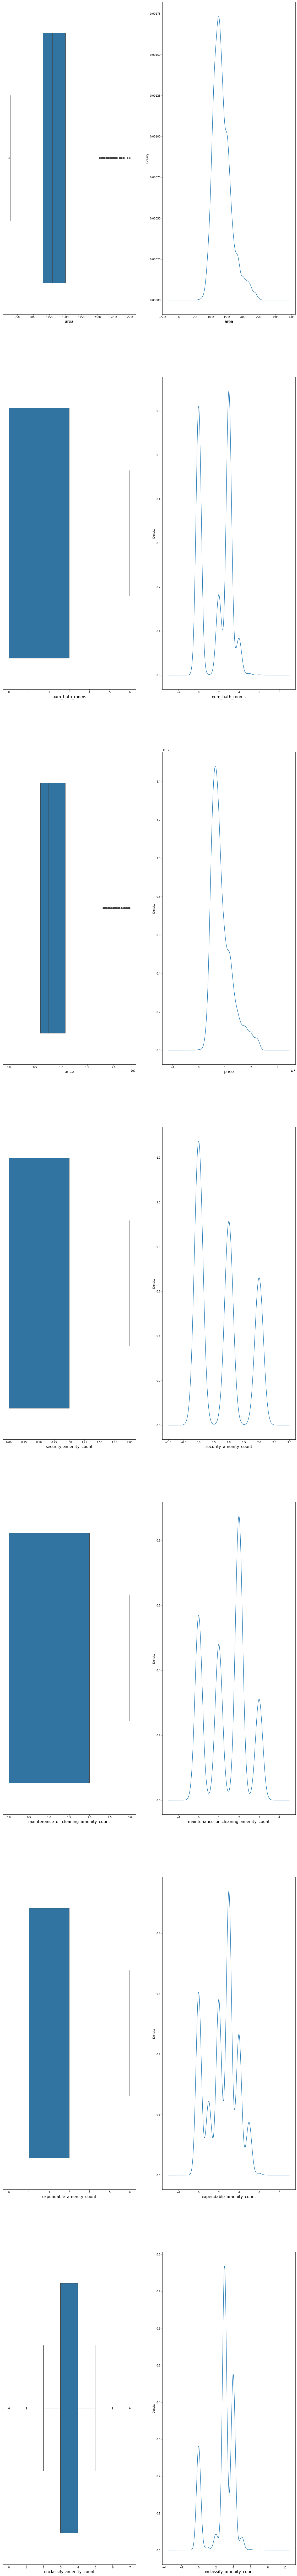

In [65]:
plot_distribution_in_features(df=sale_df)

### Manually removing outliers in `sale_df.area`

In [66]:
column="area"

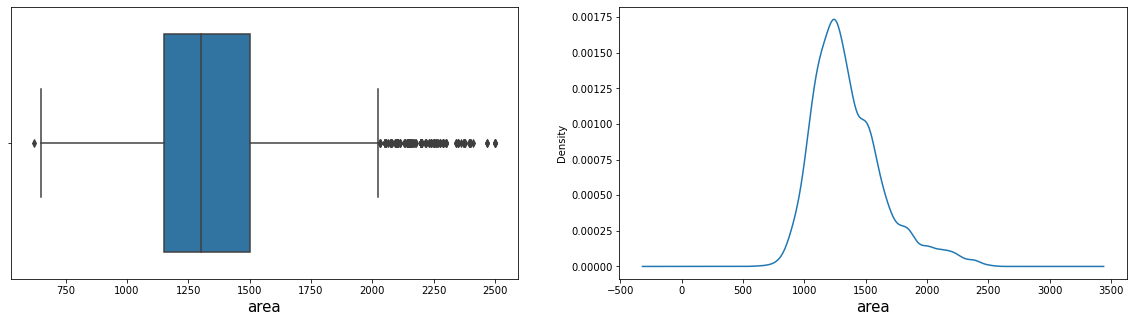

In [67]:
plot_distribution_in_feature(df=sale_df, feature=column)

In [68]:
upper_bound_value= 2000

In [69]:
print(sorted(set(sale_df[ sale_df[column] > upper_bound_value ][column].to_list())))

[2004.0, 2009.0, 2010.0, 2015.0, 2019.0, 2020.0, 2024.0, 2025.0, 2030.0, 2033.0, 2050.0, 2053.0, 2056.0, 2057.0, 2066.0, 2071.0, 2075.0, 2080.0, 2092.0, 2094.0, 2097.0, 2100.0, 2105.0, 2113.0, 2130.0, 2132.0, 2135.0, 2140.0, 2142.0, 2146.0, 2150.0, 2154.0, 2156.0, 2157.0, 2160.0, 2165.0, 2170.0, 2175.0, 2180.0, 2200.0, 2204.0, 2215.0, 2220.0, 2230.0, 2232.0, 2240.0, 2250.0, 2260.0, 2262.0, 2270.0, 2275.0, 2277.0, 2278.0, 2287.0, 2290.0, 2300.0, 2343.0, 2350.0, 2360.0, 2374.0, 2380.0, 2394.0, 2400.0, 2410.0, 2467.0, 2500.0]


df.shape before outliers removal : (5673, 11)
Total number of outliers in data : 7
df.shape after outliers removal : (5666, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


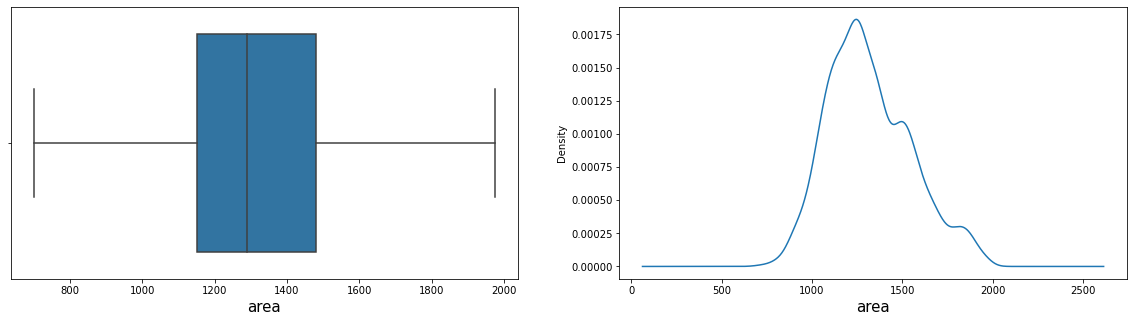

In [70]:
new_df = remove_upper_bound_outliers_in_feature(df=sale_df,feature=column, upper_bound=upper_bound_value)

In [71]:
print(sale_df.shape)
sale_df = new_df
print(sale_df.shape)

(5937, 11)
(5666, 11)


### Checking outliers presence in all features `sale_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : price
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


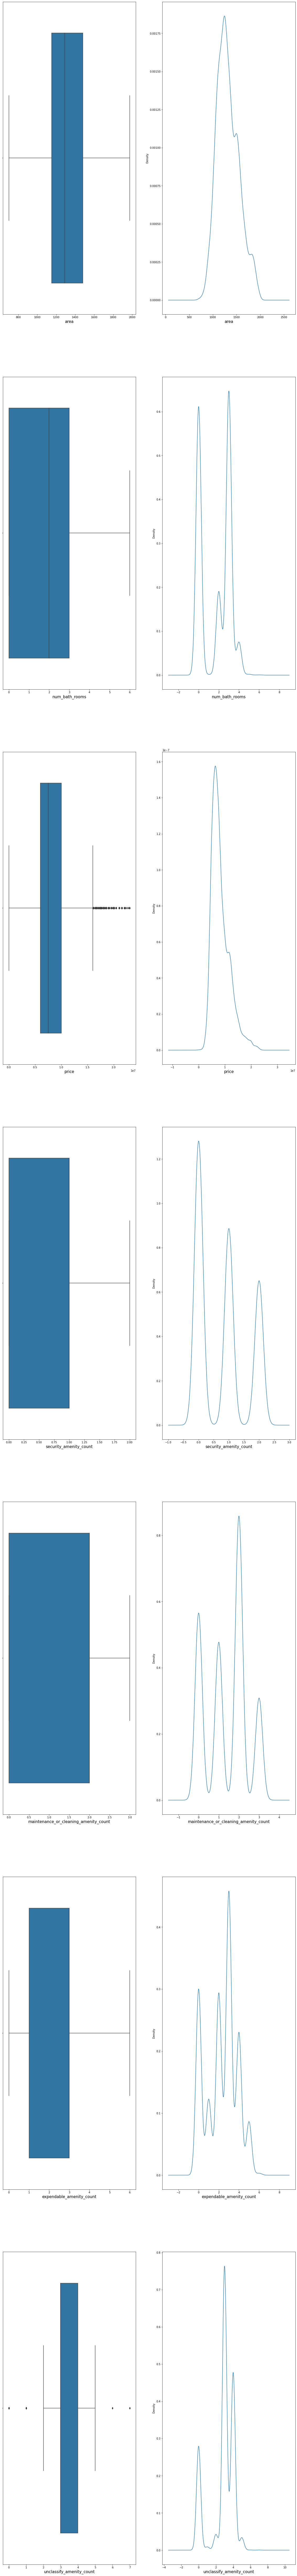

In [72]:
plot_distribution_in_features(df=sale_df)

### Manually removing outliers in `sale_df.price`

In [73]:
column="price"

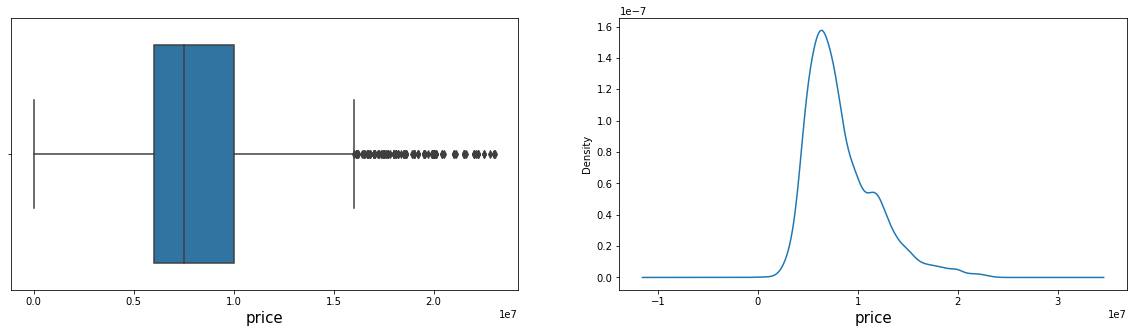

In [74]:
plot_distribution_in_feature(df=sale_df, feature=column)

In [75]:
1.75e7

17500000.0

In [76]:
upper_bound_value= 1.60e7 #1.5e7

In [77]:
print(sorted(set(sale_df[ sale_df[column] > upper_bound_value ][column].to_list())))

[16002500.0, 16092000.0, 16095000.0, 16150000.0, 16200000.0, 16399999.999999998, 16500000.0, 16650000.0, 16700000.0, 16800000.0, 17000000.0, 17000595.0, 17001500.0, 17044800.0, 17200000.0, 17270000.0, 17343600.0, 17400000.0, 17490000.0, 17500000.0, 17501040.0, 17600000.0, 17670000.0, 17700000.0, 17739000.0, 17800000.0, 18000000.0, 18002880.0, 18020000.0, 18100000.0, 18200000.0, 18375000.0, 18500000.0, 18501600.0, 18600000.0, 18920000.0, 19000000.0, 19200000.0, 19237500.0, 19500000.0, 19500750.0, 19561500.0, 19700000.0, 19900000.0, 20000000.0, 20002500.0, 20010000.0, 20095300.0, 20099200.0, 20130000.0, 20400000.0, 20500000.0, 21000000.0, 21000100.0, 21100000.0, 21500000.0, 21600000.0, 22000000.0, 22100000.0, 22200000.0, 22200000.000000004, 22500000.0, 22528000.0, 22800000.0, 23000000.0, 23064000.0]


df.shape before outliers removal : (5444, 11)
Total number of outliers in data : 13
df.shape after outliers removal : (5431, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


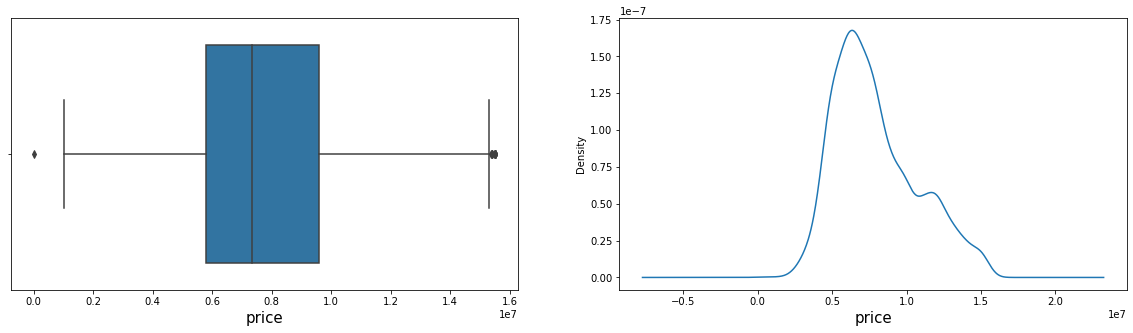

In [78]:
new_df = remove_upper_bound_outliers_in_feature(df=sale_df,feature=column, upper_bound=upper_bound_value)

In [79]:
lower_bound_value= 0.1e7

In [80]:
print(sorted(set(sale_df[ sale_df[column] < lower_bound_value ][column].to_list())))

[0.0]


df.shape before outliers removal : (5430, 11)
Total number of outliers in data : 16
df.shape after outliers removal : (5414, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


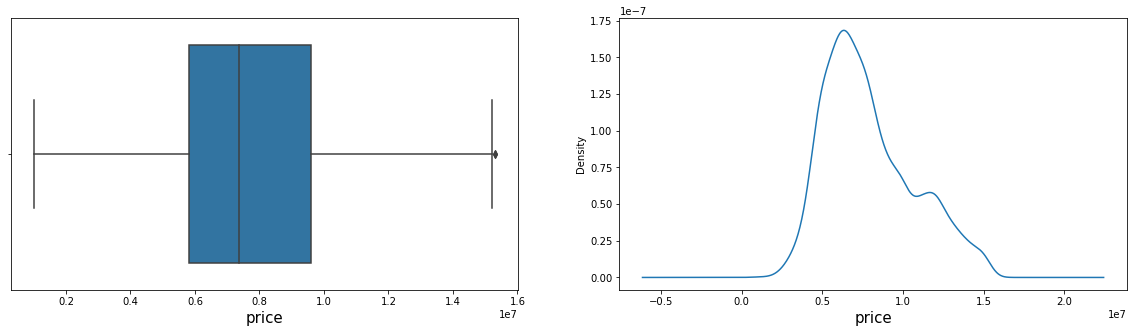

In [81]:
new_df = remove_lower_bound_outliers_in_feature(df=new_df,feature=column, lower_bound=lower_bound_value)

In [82]:
print(sale_df.shape)
sale_df = new_df
print(sale_df.shape)

(5666, 11)
(5414, 11)


### Checking outliers presence in all features `sale_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : price
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


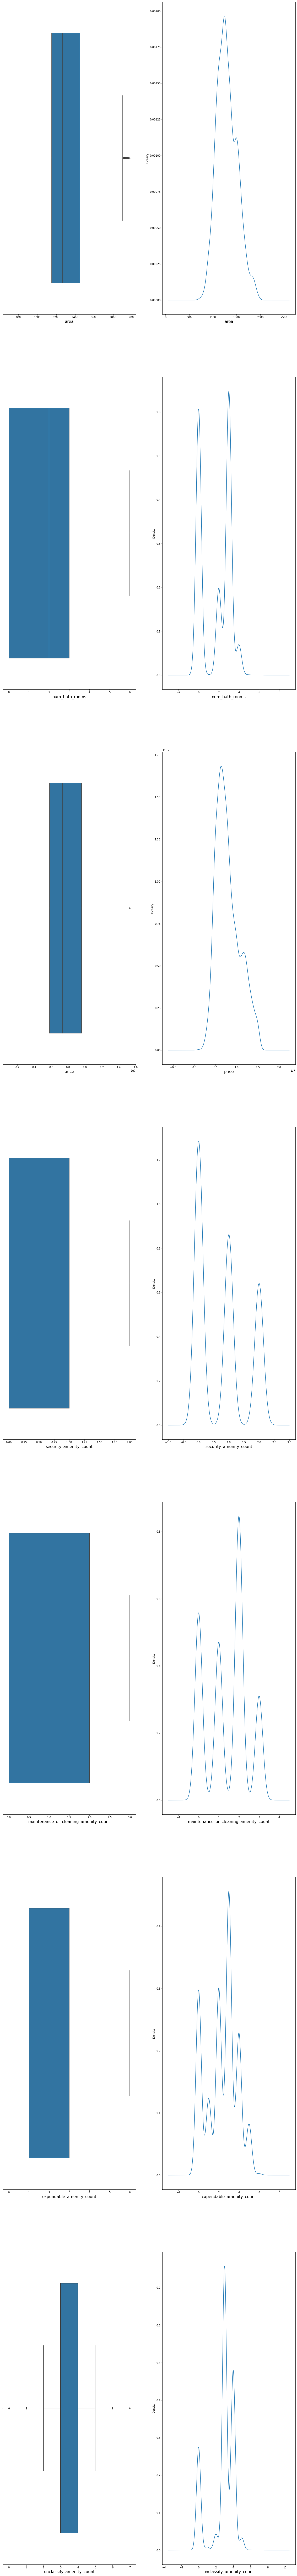

In [83]:
plot_distribution_in_features(df=sale_df)

### Manually removing outliers in `sale_df.area`

In [84]:
column="area"

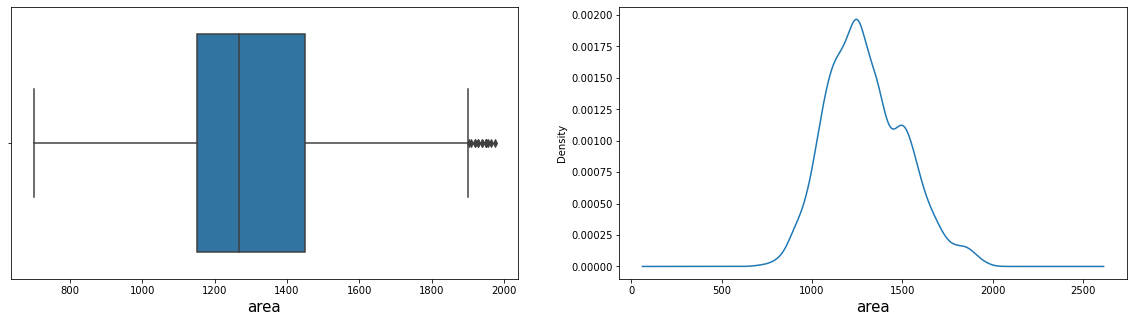

In [85]:
plot_distribution_in_feature(df=sale_df, feature=column)

In [86]:
upper_bound_value= 1900

In [87]:
print(sorted(set(sale_df[ sale_df[column] > upper_bound_value ][column].to_list())))

[1904.0, 1908.0, 1920.0, 1929.0, 1938.0, 1940.0, 1950.0, 1951.0, 1955.0, 1963.0, 1975.0]


df.shape before outliers removal : (5386, 11)
Total number of outliers in data : 0
df.shape after outliers removal : (5386, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


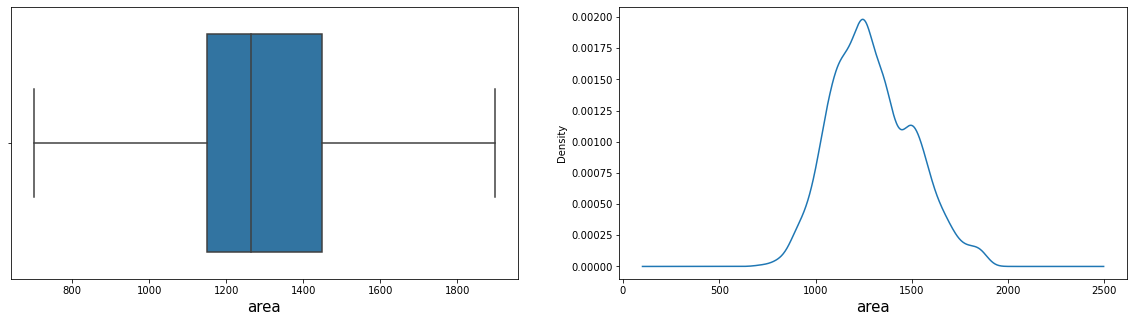

In [88]:
new_df = remove_upper_bound_outliers_in_feature(df=sale_df,feature=column, upper_bound=upper_bound_value)

In [89]:
print(sale_df.shape)
sale_df = new_df
print(sale_df.shape)

(5414, 11)
(5386, 11)


### Checking outliers presence in all features `sale_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : price
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


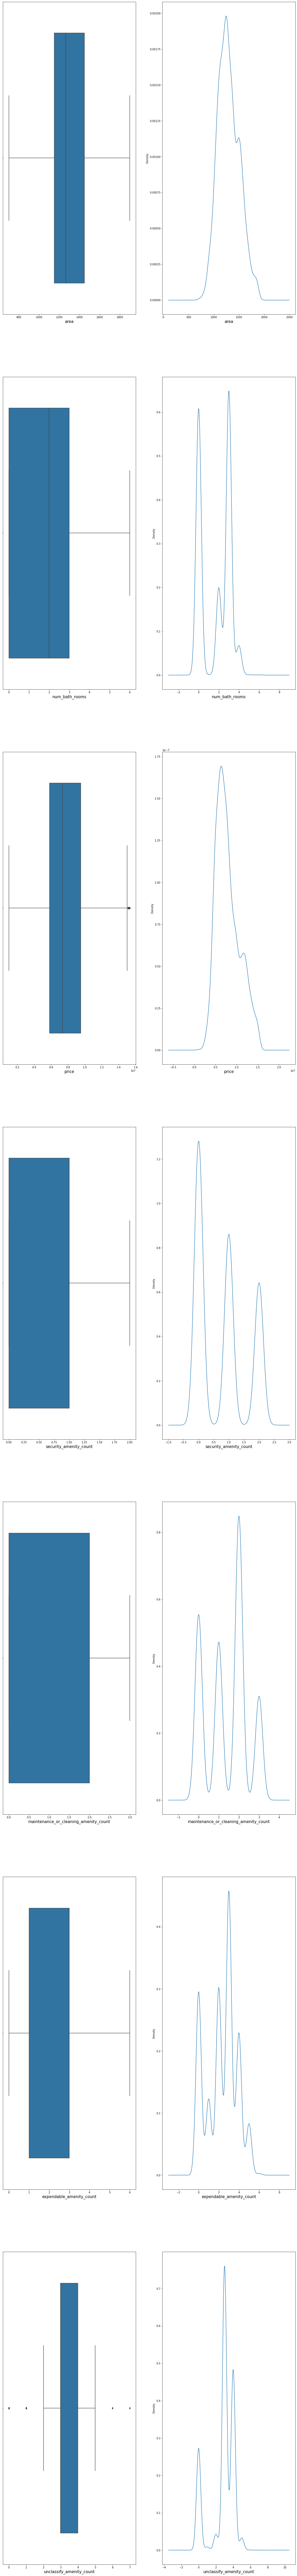

In [90]:
plot_distribution_in_features(df=sale_df)

We once again have some outliers in `price`, but we will bear with them.

### Manually removing outliers in `sale_df.unclassify_amenity_count`

In [91]:
column="unclassify_amenity_count"

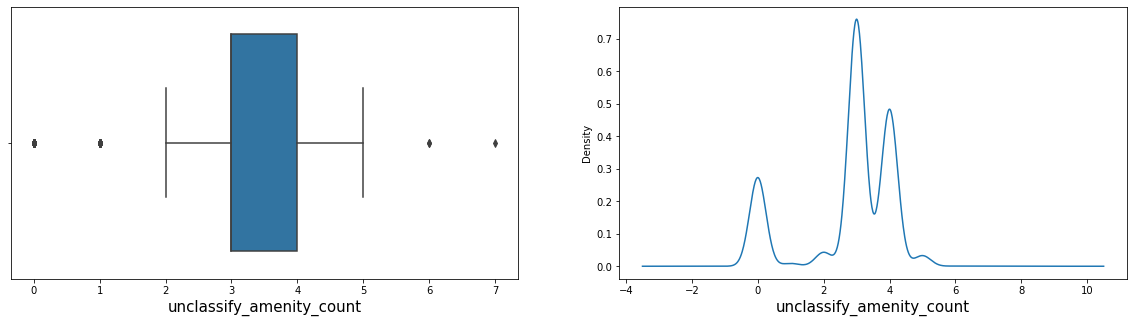

In [92]:
plot_distribution_in_feature(df=sale_df, feature=column)

In [93]:
upper_bound_value= 6

In [94]:
print(sorted(set(sale_df[ sale_df[column] > upper_bound_value ][column].to_list())))

[7]


df.shape before outliers removal : (5383, 11)
Total number of outliers in data : 947
df.shape after outliers removal : (4436, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


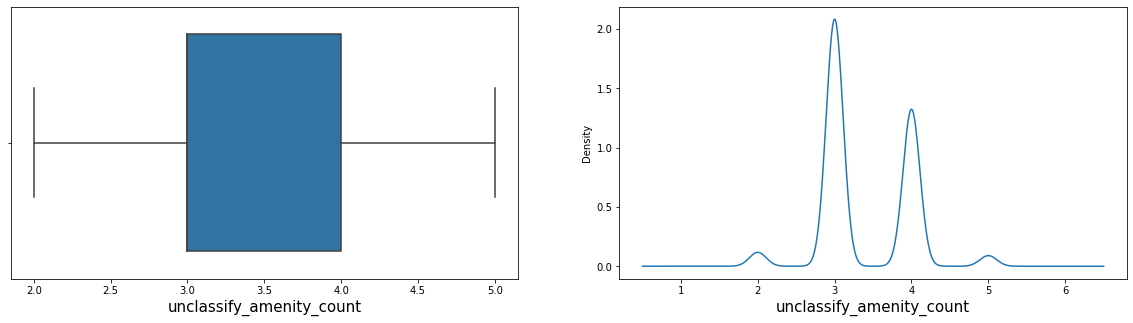

In [95]:
new_df = remove_upper_bound_outliers_in_feature(df=sale_df,feature=column, upper_bound=upper_bound_value)

In [96]:
print(sale_df.shape)
sale_df = new_df
print(sale_df.shape)

(5386, 11)
(4436, 11)


### Checking outliers presence in all features `sale_df`

Processing column : area
Processing column : num_bath_rooms
Processing column : price
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count


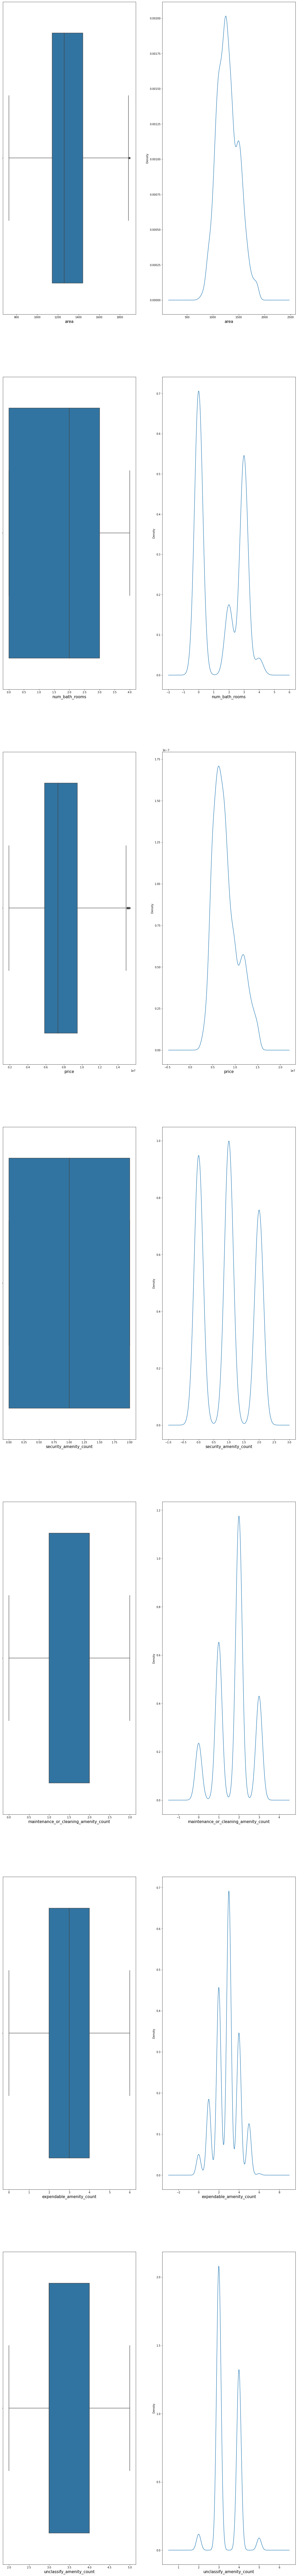

In [97]:
plot_distribution_in_features(df=sale_df)

Though there are still outliers in `price` and `area`, we will bear with them for now.

In [98]:
# df_stats = pd.merge(df_stats,properties_stats_per_purpose_and_city, on=["city","purpose"],how="inner")
# df_stats

In [99]:
sale_df.shape, rent_df.shape

((4436, 11), (8057, 11))

In [100]:
# Merging sale_df and rent_df
merged_df = pd.concat([sale_df, rent_df],ignore_index=True)
merged_df.shape

(12493, 13)

In [101]:
merged_df.head().T

0            1            2  \
area                                        1185.0       1140.0       1445.0   
building_type                            Apartment    Apartment    Apartment   
num_bath_rooms                                 0.0          0.0          3.0   
price                                    6100000.0    7500000.0   10800000.0   
purpose                                       Sale         Sale         Sale   
locality                                  Khilgaon       Mirpur     Banasree   
id                                     bproperty-0  bproperty-2  bproperty-4   
security_amenity_count                         1.0          2.0          0.0   
maintenance_or_cleaning_amenity_count          2.0          2.0          2.0   
expendable_amenity_count                         2            2            1   
unclassify_amenity_count                         3            4            4   
building_nature                                NaN          NaN          NaN   
num_bed_rooms                                  NaN          NaN          NaN   

                                                 3             4  
area                                        1475.0        1600.0  
building_type                            Apartment     Apartment  
num_bath_rooms                                 3.0           3.0  
price                                   10500000.0    13100000.0  
purpose                                       Sale          Sale  
locality                                    Uttara       Rampura  
id                                     bproperty-7  bproperty-12  
security_amenity_count                         2.0           0.0  
maintenance_or_cleaning_amenity_count          3.0           2.0  
expendable_amenity_count                         3             2  
unclassify_amenity_count                         4             3  
building_nature                                NaN           NaN  
num_bed_rooms                                  NaN           NaN

In [102]:
drop_features_with_one_occurence(df=merged_df)

Shape before processing: (12493, 13)
Shape after processing: (12493, 13)


area building_type  num_bath_rooms       price purpose   locality  \
0      1185.0     Apartment             0.0   6100000.0    Sale   Khilgaon   
1      1140.0     Apartment             0.0   7500000.0    Sale     Mirpur   
2      1445.0     Apartment             3.0  10800000.0    Sale   Banasree   
3      1475.0     Apartment             3.0  10500000.0    Sale     Uttara   
4      1600.0     Apartment             3.0  13100000.0    Sale    Rampura   
...       ...           ...             ...         ...     ...        ...   
12488     0.0     Apartment             1.0         0.0    Rent  Dhanmondi   
12489     0.0     Apartment             2.0         0.0    Rent     Uttara   
12490  1230.0     Apartment             3.0         0.0    Rent     Mirpur   
12491     0.0     Apartment             2.0         0.0    Rent     Mirpur   
12492     0.0     Apartment             2.0         0.0    Rent     Mirpur   

                  id  security_amenity_count  \
0        bproperty-0                     1.0   
1        bproperty-2                     2.0   
2        bproperty-4                     0.0   
3        bproperty-7                     2.0   
4       bproperty-12                     0.0   
...              ...                     ...   
12488  thetolet-2551                     NaN   
12489  thetolet-2553                     NaN   
12490  thetolet-2562                     NaN   
12491  thetolet-2578                     NaN   
12492  thetolet-2579                     NaN   

       maintenance_or_cleaning_amenity_count  expendable_amenity_count  \
0                                        2.0                         2   
1                                        2.0                         2   
2                                        2.0                         1   
3                                        3.0                         3   
4                                        2.0                         2   
...                                      ...                       ...   
12488                                    NaN                         0   
12489                                    NaN                         0   
12490                                    NaN                         0   
12491                                    NaN                         0   
12492                                    NaN                         0   

       unclassify_amenity_count building_nature  num_bed_rooms  
0                             3             NaN            NaN  
1                             4             NaN            NaN  
2                             4             NaN            NaN  
3                             4             NaN            NaN  
4                             3             NaN            NaN  
...                         ...             ...            ...  
12488                         0     Residential            1.0  
12489                         0     Residential            2.0  
12490                         1     Residential            3.0  
12491                         0     Residential            2.0  
12492                         0     Residential            3.0  

[12493 rows x 13 columns]

Processing column : area
Processing column : num_bath_rooms
Processing column : price
Processing column : security_amenity_count
Processing column : maintenance_or_cleaning_amenity_count
Processing column : expendable_amenity_count
Processing column : unclassify_amenity_count
Processing column : num_bed_rooms


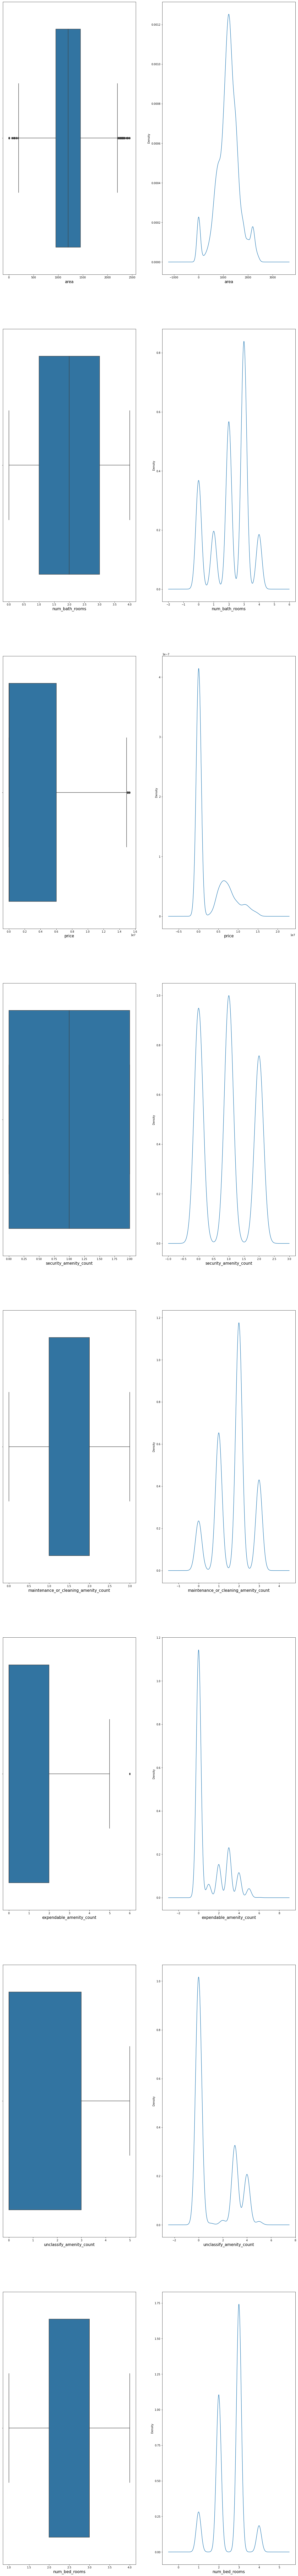

In [103]:
# Let's see if there are outliers when our rent_df and sale_df without outliers are concatened
plot_distribution_in_features(df=merged_df)

There are too much outliers in `merged_df` compared to `rent_df` and `sale_df` which are without that much outliers. So we will use `rent_df` and `sale_df` instead, and build two models: one to recommend prices for properties on rent, and the other to recommend prices for properties on sale.

In [104]:
merged_df.to_csv("merged_dataset-some outliers removed.csv",index=False)
rent_df.to_csv("rent_dataset-no outliers.csv", index=False)
sale_df.to_csv("sale_dataset-most outliers removed.csv", index=False)

In [105]:
# Dropping feature with only one occurence in rent_df
drop_features_with_one_occurence(rent_df)

Shape before processing: (8057, 11)
Dropping feature purpose
Shape after processing: (8057, 10)


area building_type building_nature  num_bath_rooms  num_bed_rooms  \
14340  1665.0     Apartment     Residential             3.0            3.0   
14486  1090.0     Apartment     Residential             2.0            3.0   
14504  1356.0     Apartment     Residential             3.0            3.0   
14937  1150.0     Apartment     Residential             3.0            3.0   
15190  1200.0     Apartment     Residential             3.0            3.0   
...       ...           ...             ...             ...            ...   
33631     0.0     Apartment     Residential             1.0            1.0   
33633     0.0     Apartment     Residential             2.0            2.0   
33640  1230.0     Apartment     Residential             3.0            3.0   
33653     0.0     Apartment     Residential             2.0            2.0   
33654     0.0     Apartment     Residential             2.0            3.0   

         price     locality               id  expendable_amenity_count  \
14340  45000.0        Badda  bproperty-14378                         0   
14486  17000.0  Mohammadpur  bproperty-14525                         0   
14504  28000.0        Badda  bproperty-14543                         0   
14937  20000.0       Mirpur  bproperty-14976                         0   
15190  22000.0  Mohammadpur  bproperty-15229                         1   
...        ...          ...              ...                       ...   
33631      0.0    Dhanmondi    thetolet-2551                         0   
33633      0.0       Uttara    thetolet-2553                         0   
33640      0.0       Mirpur    thetolet-2562                         0   
33653      0.0       Mirpur    thetolet-2578                         0   
33654      0.0       Mirpur    thetolet-2579                         0   

       unclassify_amenity_count  
14340                         0  
14486                         0  
14504                         0  
14937                         0  
15190                         3  
...                         ...  
33631                         0  
33633                         0  
33640                         1  
33653                         0  
33654                         0  

[8057 rows x 10 columns]

In [106]:
# Dropping feature with only one occurence in sale_df
drop_features_with_one_occurence(sale_df)

Shape before processing: (4436, 11)
Dropping feature purpose
Shape after processing: (4436, 10)


area building_type  num_bath_rooms       price         locality  \
0      1185.0     Apartment             0.0   6100000.0         Khilgaon   
2      1140.0     Apartment             0.0   7500000.0           Mirpur   
4      1445.0     Apartment             3.0  10800000.0         Banasree   
7      1475.0     Apartment             3.0  10500000.0           Uttara   
12     1600.0     Apartment             3.0  13100000.0          Rampura   
...       ...           ...             ...         ...              ...   
17277  1300.0     Apartment             2.0   9000000.0         Banasree   
17278  1150.0     Apartment             3.0   8200000.0  Bashundhara R-A   
17279  1305.0     Apartment             3.0   9000000.0  Bashundhara R-A   
17280  1265.0     Apartment             3.0  12500000.0   Baridhara Dohs   
17281  1700.0     Apartment             3.0  14900000.0         Banasree   

                    id  security_amenity_count  \
0          bproperty-0                       1   
2          bproperty-2                       2   
4          bproperty-4                       0   
7          bproperty-7                       2   
12        bproperty-12                       0   
...                ...                     ...   
17277  bproperty-17324                       0   
17278  bproperty-17325                       2   
17279  bproperty-17326                       0   
17280  bproperty-17327                       0   
17281  bproperty-17328                       2   

       maintenance_or_cleaning_amenity_count  expendable_amenity_count  \
0                                          2                         2   
2                                          2                         2   
4                                          2                         1   
7                                          3                         3   
12                                         2                         2   
...                                      ...                       ...   
17277                                      2                         2   
17278                                      3                         4   
17279                                      1                         3   
17280                                      0                         2   
17281                                      1                         4   

       unclassify_amenity_count  
0                             3  
2                             4  
4                             4  
7                             4  
12                            3  
...                         ...  
17277                         2  
17278                         4  
17279                         3  
17280                         3  
17281                         4  

[4436 rows x 10 columns]

In [107]:
rent_df.head().T

14340            14486            14504  \
area                               1665.0           1090.0           1356.0   
building_type                   Apartment        Apartment        Apartment   
building_nature               Residential      Residential      Residential   
num_bath_rooms                        3.0              2.0              3.0   
num_bed_rooms                         3.0              3.0              3.0   
price                             45000.0          17000.0          28000.0   
locality                            Badda      Mohammadpur            Badda   
id                        bproperty-14378  bproperty-14525  bproperty-14543   
expendable_amenity_count                0                0                0   
unclassify_amenity_count                0                0                0   

                                    14937            15190  
area                               1150.0           1200.0  
building_type                   Apartment        Apartment  
building_nature               Residential      Residential  
num_bath_rooms                        3.0              3.0  
num_bed_rooms                         3.0              3.0  
price                             20000.0          22000.0  
locality                           Mirpur      Mohammadpur  
id                        bproperty-14976  bproperty-15229  
expendable_amenity_count                0                1  
unclassify_amenity_count                0                3

`building_nature` is correlated to `building_type`. Let's drop it.

In [108]:
# Dropping building_nature in rent_df
rent_df.drop(["building_nature"], axis=1, inplace=True)
rent_df.head().T

14340            14486            14504  \
area                               1665.0           1090.0           1356.0   
building_type                   Apartment        Apartment        Apartment   
num_bath_rooms                        3.0              2.0              3.0   
num_bed_rooms                         3.0              3.0              3.0   
price                             45000.0          17000.0          28000.0   
locality                            Badda      Mohammadpur            Badda   
id                        bproperty-14378  bproperty-14525  bproperty-14543   
expendable_amenity_count                0                0                0   
unclassify_amenity_count                0                0                0   

                                    14937            15190  
area                               1150.0           1200.0  
building_type                   Apartment        Apartment  
num_bath_rooms                        3.0              3.0  
num_bed_rooms                         3.0              3.0  
price                             20000.0          22000.0  
locality                           Mirpur      Mohammadpur  
id                        bproperty-14976  bproperty-15229  
expendable_amenity_count                0                1  
unclassify_amenity_count                0                3

In [109]:
sale_df.head().T

0            2            4   \
area                                        1185.0       1140.0       1445.0   
building_type                            Apartment    Apartment    Apartment   
num_bath_rooms                                 0.0          0.0          3.0   
price                                    6100000.0    7500000.0   10800000.0   
locality                                  Khilgaon       Mirpur     Banasree   
id                                     bproperty-0  bproperty-2  bproperty-4   
security_amenity_count                           1            2            0   
maintenance_or_cleaning_amenity_count            2            2            2   
expendable_amenity_count                         2            2            1   
unclassify_amenity_count                         3            4            4   

                                                7             12  
area                                        1475.0        1600.0  
building_type                            Apartment     Apartment  
num_bath_rooms                                 3.0           3.0  
price                                   10500000.0    13100000.0  
locality                                    Uttara       Rampura  
id                                     bproperty-7  bproperty-12  
security_amenity_count                           2             0  
maintenance_or_cleaning_amenity_count            3             2  
expendable_amenity_count                         3             2  
unclassify_amenity_count                         4             3

In [110]:
# Cheking the properties types in sale_df
sale_df["building_type"].value_counts()

Apartment    4435
Duplex          1
Name: building_type, dtype: int64

In [111]:
# Cheking the properties types in sale_df
rent_df["building_type"].value_counts()

Apartment    8028
House          17
Office         12
Name: building_type, dtype: int64

# Pre-processing  data

In [112]:
rent_df.head()

area building_type  num_bath_rooms  num_bed_rooms    price  \
14340  1665.0     Apartment             3.0            3.0  45000.0   
14486  1090.0     Apartment             2.0            3.0  17000.0   
14504  1356.0     Apartment             3.0            3.0  28000.0   
14937  1150.0     Apartment             3.0            3.0  20000.0   
15190  1200.0     Apartment             3.0            3.0  22000.0   

          locality               id  expendable_amenity_count  \
14340        Badda  bproperty-14378                         0   
14486  Mohammadpur  bproperty-14525                         0   
14504        Badda  bproperty-14543                         0   
14937       Mirpur  bproperty-14976                         0   
15190  Mohammadpur  bproperty-15229                         1   

       unclassify_amenity_count  
14340                         0  
14486                         0  
14504                         0  
14937                         0  
15190                         3

In [113]:
# shuffle rent_df in order to avoid bias in the future models
rent_df = rent_df.sample(frac=1, random_state=42)
rent_df.head()

area building_type  num_bath_rooms  num_bed_rooms    price  \
25744   550.0     Apartment             1.0            2.0  12000.0   
30123  1150.0     Apartment             3.0            3.0  18000.0   
24693  2160.0     Apartment             3.0            3.0  40000.0   
29689  1400.0     Apartment             3.0            3.0  32000.0   
26520   450.0     Apartment             1.0            1.0   9000.0   

             locality             id  expendable_amenity_count  \
25744       Banashree  pbazaar-10704                         0   
30123          Mirpur  pbazaar-15147                         0   
24693  Bashundhara RA   pbazaar-9630                         0   
29689       Moghbazar  pbazaar-14706                         0   
26520    Mohammadpur   pbazaar-11504                         0   

       unclassify_amenity_count  
25744                         0  
30123                         0  
24693                         0  
29689                         0  
26520                         0

In [114]:
sale_df.head()

area building_type  num_bath_rooms       price  locality            id  \
0   1185.0     Apartment             0.0   6100000.0  Khilgaon   bproperty-0   
2   1140.0     Apartment             0.0   7500000.0    Mirpur   bproperty-2   
4   1445.0     Apartment             3.0  10800000.0  Banasree   bproperty-4   
7   1475.0     Apartment             3.0  10500000.0    Uttara   bproperty-7   
12  1600.0     Apartment             3.0  13100000.0   Rampura  bproperty-12   

    security_amenity_count  maintenance_or_cleaning_amenity_count  \
0                        1                                      2   
2                        2                                      2   
4                        0                                      2   
7                        2                                      3   
12                       0                                      2   

    expendable_amenity_count  unclassify_amenity_count  
0                          2                         3  
2                          2                         4  
4                          1                         4  
7                          3                         4  
12                         2                         3

In [115]:
# shuffle sale_df in order to avoid bias in the future models
sale_df = sale_df.sample(frac=1, random_state=42)
sale_df.head()

area building_type  num_bath_rooms       price         locality  \
8944  1250.0     Apartment             3.0   5800000.0      Mohammadpur   
1858  1350.0     Apartment             0.0  12500000.0  Bashundhara R-A   
7333  1300.0     Apartment             0.0   8000000.0           Mirpur   
8529  1200.0     Apartment             0.0   5200000.0           Mirpur   
726    800.0     Apartment             2.0   4700000.0           Mirpur   

                  id  security_amenity_count  \
8944  bproperty-8963                       0   
1858  bproperty-1861                       1   
7333  bproperty-7350                       0   
8529  bproperty-8547                       0   
726    bproperty-728                       0   

      maintenance_or_cleaning_amenity_count  expendable_amenity_count  \
8944                                      1                         2   
1858                                      2                         2   
7333                                      1                         1   
8529                                      1                         5   
726                                       2                         1   

      unclassify_amenity_count  
8944                         4  
1858                         3  
7333                         3  
8529                         3  
726                          4

In [116]:
# Extracting the target variable
rent_df_Y = rent_df.pop("price")
rent_df_Y[:5]

25744    12000.0
30123    18000.0
24693    40000.0
29689    32000.0
26520     9000.0
Name: price, dtype: float64

In [117]:
rent_df_X = rent_df.loc[:,:]
rent_df_X.drop(["id"],axis=1,inplace=True)
rent_df_X.head()

area building_type  num_bath_rooms  num_bed_rooms        locality  \
25744   550.0     Apartment             1.0            2.0       Banashree   
30123  1150.0     Apartment             3.0            3.0          Mirpur   
24693  2160.0     Apartment             3.0            3.0  Bashundhara RA   
29689  1400.0     Apartment             3.0            3.0       Moghbazar   
26520   450.0     Apartment             1.0            1.0    Mohammadpur    

       expendable_amenity_count  unclassify_amenity_count  
25744                         0                         0  
30123                         0                         0  
24693                         0                         0  
29689                         0                         0  
26520                         0                         0

In [118]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8057 entries, 25744 to 31284
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area                      8057 non-null   float64
 1   building_type             8057 non-null   object 
 2   num_bath_rooms            8057 non-null   float64
 3   num_bed_rooms             8057 non-null   float64
 4   locality                  8057 non-null   object 
 5   expendable_amenity_count  8057 non-null   int64  
 6   unclassify_amenity_count  8057 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 503.6+ KB


In [119]:
rent_df.head()

area building_type  num_bath_rooms  num_bed_rooms        locality  \
25744   550.0     Apartment             1.0            2.0       Banashree   
30123  1150.0     Apartment             3.0            3.0          Mirpur   
24693  2160.0     Apartment             3.0            3.0  Bashundhara RA   
29689  1400.0     Apartment             3.0            3.0       Moghbazar   
26520   450.0     Apartment             1.0            1.0    Mohammadpur    

       expendable_amenity_count  unclassify_amenity_count  
25744                         0                         0  
30123                         0                         0  
24693                         0                         0  
29689                         0                         0  
26520                         0                         0

In [120]:
# Create a column transformer
rent_column_transformer_1 = make_column_transformer(
     # The features indicated in the list below are those that will be rescaled at this stage of the preprocessing
    ( MinMaxScaler(),["area", "num_bath_rooms", "num_bed_rooms", "expendable_amenity_count", "unclassify_amenity_count"] ),
    
    # handle_unknown="ignore" (in the below code) will make the OneHotEncoder() ignore any column it doesn't know about
    (OneHotEncoder(handle_unknown="ignore"), ["building_type"]), # ["building_type","locality"]
    #(LabelEncoder(), ["locality"])
    
)

rent_column_transformer_1

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['building_type'])])

❗ **Adding `locality` to the onehot encoder of the pipeline create a sparse matrix when the transformer is fitted on the data, which in turn create a spare `TypeError: 'SparseTensor' object is not subscriptable` error when fitted on the TensorFlow model.** 

TODO: search why the above error, and how to solve it.

In [121]:
rent_df_X.shape

(8057, 7)

In [122]:
# Build train and testing sets
rent_X_train, rent_X_test, rent_y_train, rent_y_test= train_test_split(rent_df_X, rent_df_Y, test_size=.15, 
                                                                       random_state=42, shuffle=True )

In [123]:
rent_X_train.head()

area building_type  num_bath_rooms  num_bed_rooms        locality  \
29834  1000.0     Apartment             2.0            2.0          Kafrul   
28088  1200.0     Apartment             1.0            3.0  Kamrangir Char   
32395     0.0     Apartment             1.0            1.0       Mohakhali   
19322   600.0     Apartment             2.0            2.0    Mohammadpur    
27601  1875.0     Apartment             3.0            3.0  Bashundhara RA   

       expendable_amenity_count  unclassify_amenity_count  
29834                         0                         0  
28088                         0                         0  
32395                         0                         0  
19322                         0                         0  
27601                         0                         0

In [124]:
rent_y_train.head()

29834    15000.0
28088    10500.0
32395        0.0
19322    20000.0
27601    41000.0
Name: price, dtype: float64

In [125]:
rent_X_train.shape, rent_X_test.shape, rent_y_train.shape, rent_y_test.shape

((6848, 7), (1209, 7), (6848,), (1209,))

Now we will fit the column transformer to the training data.        
*🔑  Whenever we have a column transformer, we need to fit it the training data and then use that fit column transformer to transform the test data.*

In [126]:
# Fit the column transformer to the training data
rent_column_transformer_1.fit(rent_X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['building_type'])])

In [127]:
# Save the column transformer in a file (with pickle)

# TODO: write the code here

Now we will take what was learned from the training data by the column transformer to transform the training and testing data.

In [128]:
# Transform train set with column transformer
rent_X_train_normal = rent_column_transformer_1.transform(rent_X_train)
rent_X_train_normal[:3]

array([[0.40816327, 0.33333333, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.48979592, 0.        , 0.66666667, 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ]])

In [129]:
rent_X_train_normal.shape

(6848, 8)

In [130]:
# Transform testing set with column transformer
rent_X_test_normal = rent_column_transformer_1.transform(rent_X_test)
rent_X_test_normal[:3]

array([[0.36734694, 0.        , 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.85714286, 0.66666667, 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.16326531, 0.33333333, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        ]])

In [131]:
# tf.expand_dims(rent_X_test_normal, axis=rent_X_test_normal.shape[0])

# Experimenting on DL models

In [132]:
# This dictionnary will contain the log of the future models experiments
experiments_log = {
    "model_name":[],
    "model_summary":[],
    "model_training_history":[],
    "model_training_epochs_count":[],
    "model_checkpoint_path":[],
    "training_objective":[],
    "training_report":[],
    "training_recommendation":[],
    
}

experiments_log

{'model_name': [],
 'model_summary': [],
 'model_training_history': [],
 'model_training_epochs_count': [],
 'model_checkpoint_path': [],
 'training_objective': [],
 'training_report': [],
 'training_recommendation': []}

<span id="experiment-1"></span>

### Experiment 1
* 3 layers
* loss: MAE
* optimizer: SGD()
* metrics: MAE
* epochs: 50

In [133]:
# Building a model to predict properties prices

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
rent_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
rent_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

# 3. Fit the model
n_epochs=50
rent_history_1 = rent_model_1.fit(rent_X_train_normal, rent_y_train, 
                                  #validation_data=(rent_X_test_normal, rent_y_test),
                                  validation_split=.15, shuffle=True,
                                  epochs=n_epochs, verbose=1,)

Epoch 1/50
182/182 [==============================] - 1s 4ms/step - loss: 16939.1602 - mae: 16939.1602 - val_loss: 8580.4580 - val_mae: 8580.4580
Epoch 2/50
182/182 [==============================] - 0s 3ms/step - loss: 8886.7041 - mae: 8886.7041 - val_loss: 10543.4541 - val_mae: 10543.4541
Epoch 3/50
182/182 [==============================] - 0s 3ms/step - loss: 9027.1074 - mae: 9027.1074 - val_loss: 5669.3452 - val_mae: 5669.3452
Epoch 4/50
182/182 [==============================] - 1s 3ms/step - loss: 8632.6465 - mae: 8632.6465 - val_loss: 5462.1582 - val_mae: 5462.1582
Epoch 5/50
182/182 [==============================] - 1s 3ms/step - loss: 8850.5732 - mae: 8850.5732 - val_loss: 8593.4785 - val_mae: 8593.4785
Epoch 6/50
182/182 [==============================] - 0s 3ms/step - loss: 8431.0312 - mae: 8431.0312 - val_loss: 12869.0537 - val_mae: 12869.0537
Epoch 7/50
182/182 [==============================] - 1s 3ms/step - loss: 8579.1299 - mae: 8579.1299 - val_loss: 6271.1553 - val_m

In [134]:
# Predict on unseen data during training
rent_y_pred_1 = rent_model_1.predict(rent_X_test_normal)
rent_y_pred_1[:10]

38/38 [==============================] - 0s 2ms/step


array([[1.4171650e+04],
       [3.5106000e+04],
       [1.2115987e+04],
       [2.1230062e+04],
       [2.4473104e+04],
       [1.4302236e+04],
       [1.4447980e+04],
       [2.5659070e+04],
       [2.5198431e+00],
       [1.5030952e+04]], dtype=float32)

In [135]:
rent_mae_1 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_1))
rent_mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=5021.394>

history_df.head()
           loss           mae      val_loss       val_mae
0  16939.160156  16939.160156   8580.458008   8580.458008
1   8886.704102   8886.704102  10543.454102  10543.454102
2   9027.107422   9027.107422   5669.345215   5669.345215
3   8632.646484   8632.646484   5462.158203   5462.158203
4   8850.573242   8850.573242   8593.478516   8593.478516


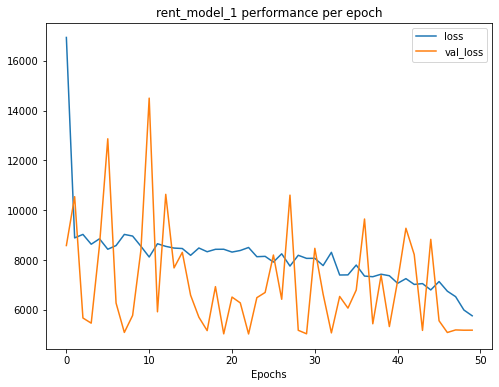

In [136]:
plot_training_history(history=rent_history_1, metrics_to_plot=["loss","val_loss"], 
                      plot_title="rent_model_1 performance per epoch",plot_size=(8,6))

In [137]:
# history_df = pd.DataFrame(rent_history_1.history)
# history_df.head()

In [138]:
# history_df["loss"].plot()
# history_df.plot()

In [139]:
# plot_predictions(train_X=rent_X_train, train_labels=rent_y_train, 
#                  test_X=rent_X_test, test_labels=rent_y_test, 
#                  predictions=rent_y_pred_1)

In [140]:
experiments_log["model_name"].append("rent_model_1")
experiments_log["model_summary"].append(rent_model_1.summary())
experiments_log["model_training_history"].append(rent_history_1.history)
experiments_log["model_training_epochs_count"].append(n_epochs)
experiments_log["model_checkpoint_path"].append(np.NaN)
experiments_log["training_objective"].append("Define a baseline model")

report="1ST EPOCH METRICS: loss: 18555.6719 - mae: 18555.6719 - val_loss: 12088.6016 - val_mae: 12088.6016 \n LAST EPOCH METRICS: loss: 6127.9341 - mae: 6127.9341 - val_loss: 10010.2510 - val_mae: 10010.2510  \n Observation: there is an improvement in the model."
experiments_log["training_report"].append(report)  

experiments_log["training_recommendation"].append("Build the same model again, but try replacing the optimizer from SGD to Adam")

# experiments_log

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [141]:
# experiments_log = {
#     "model_name":[],
#     "model_summary":[],
#     "model_training_history":[],
#     "model_training_epochs_count":[],
#     "model_checkpoint_path":[],
#     "training_objective":[],
#     "training_report":[],
#     "training_recommendation":[],
    
# }


<span id="experiment-2"></span>

### Experiment 2
* Same model as in [experiment 1](experiment-1)
* Try using Adam instead of SGD for optimizer

**Objective**: try improving model built on [experiment 1](experiment-1)

In [142]:
# Building a model to predict properties on rent prices

# Set random seed
tf.random.set_seed(42)

# 1. Create model 
rent_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense( 1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
rent_model_2.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=50
rent_history_2 = rent_model_2.fit(rent_X_train_normal, rent_y_train,
                                 validation_split=.15, shuffle=True,
                                 epochs=n_epochs, verbose=1)

Epoch 1/50
182/182 [==============================] - 1s 2ms/step - loss: 21685.0898 - mae: 21685.0898 - val_loss: 21444.2363 - val_mae: 21444.2363
Epoch 2/50
182/182 [==============================] - 0s 2ms/step - loss: 21561.3438 - mae: 21561.3438 - val_loss: 21179.4863 - val_mae: 21179.4863
Epoch 3/50
182/182 [==============================] - 0s 2ms/step - loss: 21060.7480 - mae: 21060.7480 - val_loss: 20402.9570 - val_mae: 20402.9570
Epoch 4/50
182/182 [==============================] - 0s 2ms/step - loss: 19930.5137 - mae: 19930.5137 - val_loss: 18892.2676 - val_mae: 18892.2676
Epoch 5/50
182/182 [==============================] - 0s 2ms/step - loss: 17961.2969 - mae: 17961.2969 - val_loss: 16441.4824 - val_mae: 16441.4824
Epoch 6/50
182/182 [==============================] - 0s 2ms/step - loss: 14953.5000 - mae: 14953.5000 - val_loss: 12888.7422 - val_mae: 12888.7422
Epoch 7/50
182/182 [==============================] - 0s 2ms/step - loss: 11009.8398 - mae: 11009.8398 - val_los

In [143]:
# Predict on unseen data during training
rent_y_pred_2 = rent_model_2.predict(rent_X_test_normal)
rent_y_pred_2[:5]

38/38 [==============================] - 0s 2ms/step


array([[12973.135 ],
       [36118.957 ],
       [ 9694.3125],
       [25181.889 ],
       [27153.057 ]], dtype=float32)

In [144]:
# rent_model_2 MAE
rent_mae_2 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_2))
rent_mae_2   

<tf.Tensor: shape=(), dtype=float32, numpy=5150.9688>

In [145]:
# Recalling rent_model_1 MAE
rent_mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=5021.394>

<span id="experiment2-observation1"> </span>

**Observation (1):**  
`rent_model_2` has a MAE of `5076.522`; it is performing better than `rent_model_1` which has a MAE of `8012.8213`. 

history_df.head()
           loss           mae      val_loss       val_mae
0  21685.089844  21685.089844  21444.236328  21444.236328
1  21561.343750  21561.343750  21179.486328  21179.486328
2  21060.748047  21060.748047  20402.957031  20402.957031
3  19930.513672  19930.513672  18892.267578  18892.267578
4  17961.296875  17961.296875  16441.482422  16441.482422


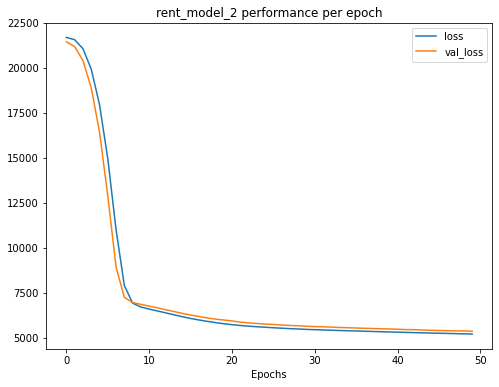

In [146]:
# Plot rent_history_2 training history
plot_training_history(history=rent_history_2, metrics_to_plot=["loss","val_loss"],  
                      plot_title="rent_model_2 performance per epoch",plot_size=(8,6))

history_df.head()
           loss           mae      val_loss       val_mae
0  16939.160156  16939.160156   8580.458008   8580.458008
1   8886.704102   8886.704102  10543.454102  10543.454102
2   9027.107422   9027.107422   5669.345215   5669.345215
3   8632.646484   8632.646484   5462.158203   5462.158203
4   8850.573242   8850.573242   8593.478516   8593.478516


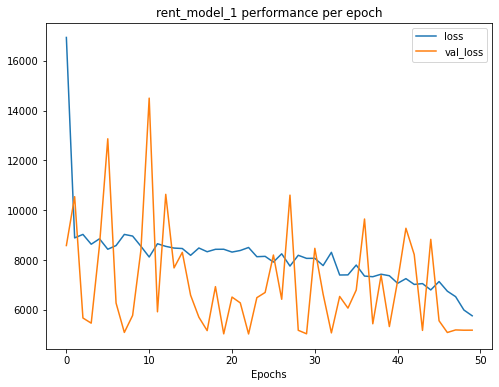

In [147]:
# Recalling the history of rent_history_1
plot_training_history(history=rent_history_1, metrics_to_plot=["loss","val_loss"],
                      plot_title="rent_model_1 performance per epoch",plot_size=(8,6))

<span id="experiment2-observation2"> </span>

**Observation (2):**  
`rent_model_2` loss and validation loss improvement are much better than those of `rent_model_1`, though their values at the 50th epoch are nearly the same.

<span id="experiment2-conclusion"> </span>

**Experiment 2 conclusion:**      
From [observation 1](#experiment2-observation1) and [observation 2](#experiment2-observation2), we can conclude that we should use Adam instead of SGD for the optimizer.

In [148]:
experiments_log["model_name"].append("rent_model_2")
experiments_log["model_summary"].append(rent_model_2.summary())
experiments_log["model_training_history"].append(rent_history_2.history)
experiments_log["model_training_epochs_count"].append(n_epochs)
experiments_log["model_checkpoint_path"].append(np.NaN)
experiments_log["training_objective"].append("Try to improve rent_model_1 by using Adam instead of SGD for the optimizer")

report="When we used Adam instead of SGD for the optimizer, there was a clear improvement in the model performance on training and testing. We should use Adam as our optimizer."
experiments_log["training_report"].append(report)  

experiments_log["training_recommendation"].append("Build the same model as rent_model_1, while using Adam for optimizer; but try replacing the activation function on the last layer from linear to others to see which one will perform better")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               900       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


<span id="rent-experiment3"></span>

### Experiment 3
* Same model as in [experiment 1](#experiment-1)
* Use Adam instead of SGD for optimizer
* Try using activation functions other than linear on the last layer in order to see which one will perform better

**Objective**: try improving model built on [experiment 1](#experiment-1)

In [149]:
# Build model to predict properties on rent prices

# Set a random seed 
tf.random.set_seed(42)

# 1. Create a model
rent_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.exponential)
])

# 2. Compile the model
rent_model_3.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=50
rent_history_3 = rent_model_3.fit(rent_X_train_normal, rent_y_train,
                                  validation_split=.15, shuffle=True,
                                  epochs=n_epochs, verbose=1,)

Epoch 1/50
182/182 [==============================] - 1s 3ms/step - loss: 18911.7148 - mae: 18911.7148 - val_loss: 13653.7441 - val_mae: 13653.7441
Epoch 2/50
182/182 [==============================] - 0s 2ms/step - loss: 9362.2441 - mae: 9362.2441 - val_loss: 5830.9224 - val_mae: 5830.9224
Epoch 3/50
182/182 [==============================] - 0s 2ms/step - loss: 5446.5483 - mae: 5446.5483 - val_loss: 5367.1748 - val_mae: 5367.1748
Epoch 4/50
182/182 [==============================] - 0s 2ms/step - loss: 5290.6479 - mae: 5290.6479 - val_loss: 5325.7944 - val_mae: 5325.7944
Epoch 5/50
182/182 [==============================] - 1s 3ms/step - loss: 5260.8550 - mae: 5260.8550 - val_loss: 5165.9180 - val_mae: 5165.9180
Epoch 6/50
182/182 [==============================] - 1s 3ms/step - loss: 5172.7104 - mae: 5172.7104 - val_loss: 5163.4653 - val_mae: 5163.4653
Epoch 7/50
182/182 [==============================] - 1s 3ms/step - loss: 5141.0610 - mae: 5141.0610 - val_loss: 5856.5337 - val_mae

In [150]:
# Predict on unseen data during training
rent_y_pred_3 = rent_model_3.predict(rent_X_test_normal)
rent_y_pred_3[:5]

38/38 [==============================] - 0s 2ms/step


array([[15855.327],
       [34573.7  ],
       [11102.114],
       [26661.61 ],
       [30874.432]], dtype=float32)

In [151]:
# rent_model_3 MAE
rent_mae_3 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_3))
rent_mae_3   

<tf.Tensor: shape=(), dtype=float32, numpy=4795.2744>

In [152]:
# Recalling rent_model_1 MAE
rent_mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=5021.394>

In [153]:
# Recalling rent_model_2 MAE
rent_mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=5150.9688>

<span id="rent-experiment3-observation1"> </span>

**Observation (1):**  
`rent_model_2` has a slighty better MAE than `rent_model_3` which MAE is much better than `rent_model_1` MAE 

history_df.head()
           loss           mae      val_loss       val_mae
0  18911.714844  18911.714844  13653.744141  13653.744141
1   9362.244141   9362.244141   5830.922363   5830.922363
2   5446.548340   5446.548340   5367.174805   5367.174805
3   5290.647949   5290.647949   5325.794434   5325.794434
4   5260.854980   5260.854980   5165.917969   5165.917969


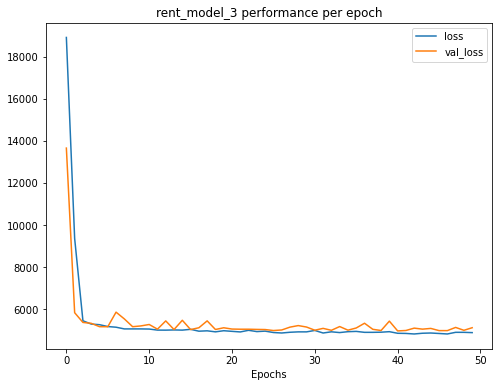

In [154]:
# Plot rent_history_3 training history
plot_training_history(history=rent_history_3, metrics_to_plot=["loss","val_loss"],  
                      plot_title="rent_model_3 performance per epoch",plot_size=(8,6))

history_df.head()
           loss           mae      val_loss       val_mae
0  21685.089844  21685.089844  21444.236328  21444.236328
1  21561.343750  21561.343750  21179.486328  21179.486328
2  21060.748047  21060.748047  20402.957031  20402.957031
3  19930.513672  19930.513672  18892.267578  18892.267578
4  17961.296875  17961.296875  16441.482422  16441.482422


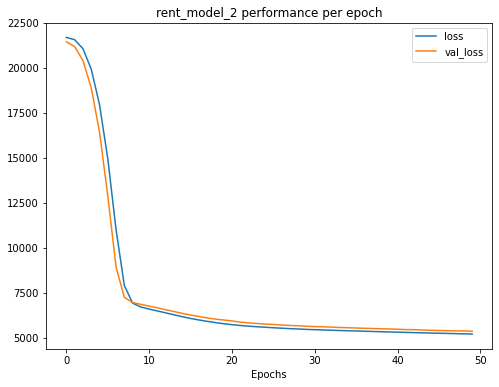

In [155]:
# Recalling the history of rent_history_2
plot_training_history(history=rent_history_2, metrics_to_plot=["loss","val_loss"],
                      plot_title="rent_model_2 performance per epoch",plot_size=(8,6))

<span id="rent-experiment3-observation2"> </span>

**Observation (2):**  
`rent_model_2` and `rent_model_3` loss and validation loss improvement each have their pro and con; it is a bit difficult to decide which one to choose.

<span id="rent-experiment3-conclusion"> </span>

**Experiment 2 conclusion:**      
From [observation 1](#rent-experiment3-observation1) and [observation 2](#rent-experiment3-observation2), we are going to train two new exact same models as `rent_model_2` and `rent_model_3` for 100 more epochs (for a total of 150 epochs each) to decide which one to choose.

In [156]:
experiments_log["model_name"].append("rent_model_3")
experiments_log["model_summary"].append(rent_model_3.summary())
experiments_log["model_training_history"].append(rent_history_3.history)
experiments_log["model_training_epochs_count"].append(n_epochs)
experiments_log["model_checkpoint_path"].append(np.NaN)
experiments_log["training_objective"].append("Try to improve rent_model_1 having Adam as optimizer. The goal is to use activation functions other than linear on the last layer in order to see which one will perform better")

report="It is difficult to decide which of rent_model_2 and rent_model_3 (each of them an improvement of rent_model_1), is performing better than the other"
experiments_log["training_report"].append(report)  

experiments_log["training_recommendation"].append("Train two new exact same models as `rent_model_2` and `rent_model_3` for 100 more epochs (for a total of 150 epochs each) to decide which one to choose")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               900       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


<span id="rent-experiment-4"></span>

### Experiment 4
* Build `rent_model_4`, the exact same model as in [experiment 2](#experiment-2), but train it for 150 epochs
* Build `rent_model_5`, the exact same model as in [experiment 3](#rent-experiment-3), but train it for 150 epochs
* Compare the performance of the two newly built model

**Objective**: Choose which of `rent_model_2` and `rent_model_3` architecture are better for learning on our data.

##### Building `rent_model_4` ( `rent_model_2` trained for longer) 

In [157]:
# Building a model to predict properties on rent prices

# Set random seed
tf.random.set_seed(42)

# 1. Create model 
rent_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense( 1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
rent_model_4.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=150
rent_history_4 = rent_model_4.fit(rent_X_train_normal, rent_y_train,
                                 validation_split=.15, shuffle=True,
                                 epochs=n_epochs, verbose=1)

Epoch 1/150
182/182 [==============================] - 1s 3ms/step - loss: 21679.5391 - mae: 21679.5391 - val_loss: 21422.8086 - val_mae: 21422.8086
Epoch 2/150
182/182 [==============================] - 1s 3ms/step - loss: 21474.7930 - mae: 21474.7930 - val_loss: 20989.2207 - val_mae: 20989.2207
Epoch 3/150
182/182 [==============================] - 1s 3ms/step - loss: 20664.6113 - mae: 20664.6113 - val_loss: 19744.3086 - val_mae: 19744.3086
Epoch 4/150
182/182 [==============================] - 1s 3ms/step - loss: 18881.3203 - mae: 18881.3203 - val_loss: 17381.2344 - val_mae: 17381.2344
Epoch 5/150
182/182 [==============================] - 1s 3ms/step - loss: 15815.6953 - mae: 15815.6953 - val_loss: 13591.6650 - val_mae: 13591.6650
Epoch 6/150
182/182 [==============================] - 0s 2ms/step - loss: 11380.0596 - mae: 11380.0596 - val_loss: 8940.3535 - val_mae: 8940.3535
Epoch 7/150
182/182 [==============================] - 1s 3ms/step - loss: 7753.6943 - mae: 7753.6943 - val_

182/182 [==============================] - 0s 2ms/step - loss: 5132.8374 - mae: 5132.8374 - val_loss: 5292.8867 - val_mae: 5292.8867
Epoch 58/150
182/182 [==============================] - 0s 3ms/step - loss: 5123.7998 - mae: 5123.7998 - val_loss: 5275.7222 - val_mae: 5275.7222
Epoch 59/150
182/182 [==============================] - 0s 2ms/step - loss: 5113.8545 - mae: 5113.8545 - val_loss: 5272.1631 - val_mae: 5272.1631
Epoch 60/150
182/182 [==============================] - 0s 2ms/step - loss: 5105.5181 - mae: 5105.5181 - val_loss: 5258.7090 - val_mae: 5258.7090
Epoch 61/150
182/182 [==============================] - 0s 3ms/step - loss: 5098.8525 - mae: 5098.8525 - val_loss: 5249.9194 - val_mae: 5249.9194
Epoch 62/150
182/182 [==============================] - 1s 3ms/step - loss: 5090.6279 - mae: 5090.6279 - val_loss: 5245.1650 - val_mae: 5245.1650
Epoch 63/150
182/182 [==============================] - 0s 2ms/step - loss: 5084.4717 - mae: 5084.4717 - val_loss: 5237.5684 - val_mae: 5

182/182 [==============================] - 0s 2ms/step - loss: 4931.4619 - mae: 4931.4619 - val_loss: 5067.3174 - val_mae: 5067.3174
Epoch 114/150
182/182 [==============================] - 0s 2ms/step - loss: 4930.6934 - mae: 4930.6934 - val_loss: 5063.1680 - val_mae: 5063.1680
Epoch 115/150
182/182 [==============================] - 1s 3ms/step - loss: 4930.4766 - mae: 4930.4766 - val_loss: 5062.6973 - val_mae: 5062.6973
Epoch 116/150
182/182 [==============================] - 1s 5ms/step - loss: 4929.6860 - mae: 4929.6860 - val_loss: 5060.9795 - val_mae: 5060.9795
Epoch 117/150
182/182 [==============================] - 0s 2ms/step - loss: 4928.8203 - mae: 4928.8203 - val_loss: 5059.3267 - val_mae: 5059.3267
Epoch 118/150
182/182 [==============================] - 0s 3ms/step - loss: 4928.6240 - mae: 4928.6240 - val_loss: 5060.4956 - val_mae: 5060.4956
Epoch 119/150
182/182 [==============================] - 0s 2ms/step - loss: 4926.9614 - mae: 4926.9614 - val_loss: 5058.1021 - val_

In [158]:
# Predict on unseen data during training
rent_y_pred_4 = rent_model_4.predict(rent_X_test_normal)
rent_y_pred_4[:5]

38/38 [==============================] - 0s 2ms/step


array([[15902.604],
       [36560.17 ],
       [ 7648.385],
       [24714.459],
       [27872.238]], dtype=float32)

In [159]:
# rent_model_4 MAE
rent_mae_4 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_4))
rent_mae_4   

<tf.Tensor: shape=(), dtype=float32, numpy=4860.3364>

In [160]:
# Rcalling rent_model_2 MAE
rent_mae_2   

<tf.Tensor: shape=(), dtype=float32, numpy=5150.9688>

In [161]:
# rent_model_4 improvement in MAE
rent_mae_4 - rent_mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=-290.63232>

<span id="rent-experiment4-observation1"> </span>

**Observation (1):** 

Having trained for 100 more epochs, the improvement in MAE of `rent_model_2` is `163.57422`

##### Building `rent_model_5` ( `rent_model_3` trained for longer) 

In [162]:
# Build model to predict properties on rent prices

# Set a random seed 
tf.random.set_seed(42)

# 1. Create a model
rent_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.exponential)
])

# 2. Compile the model
rent_model_5.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=150
rent_history_5 = rent_model_5.fit(rent_X_train_normal, rent_y_train,
                                  validation_split=.15, shuffle=True,
                                  epochs=n_epochs, verbose=1,)

Epoch 1/150
182/182 [==============================] - 1s 4ms/step - loss: 19826.6719 - mae: 19826.6719 - val_loss: 14712.7871 - val_mae: 14712.7871
Epoch 2/150
182/182 [==============================] - 0s 2ms/step - loss: 11664.5762 - mae: 11664.5762 - val_loss: 8514.2148 - val_mae: 8514.2148
Epoch 3/150
182/182 [==============================] - 1s 3ms/step - loss: 6256.6123 - mae: 6256.6123 - val_loss: 5581.0693 - val_mae: 5581.0693
Epoch 4/150
182/182 [==============================] - 0s 2ms/step - loss: 5261.8623 - mae: 5261.8623 - val_loss: 5259.6914 - val_mae: 5259.6914
Epoch 5/150
182/182 [==============================] - 1s 3ms/step - loss: 5214.6685 - mae: 5214.6685 - val_loss: 5177.2388 - val_mae: 5177.2388
Epoch 6/150
182/182 [==============================] - 0s 2ms/step - loss: 5112.4219 - mae: 5112.4219 - val_loss: 5123.6768 - val_mae: 5123.6768
Epoch 7/150
182/182 [==============================] - 1s 3ms/step - loss: 5067.6860 - mae: 5067.6860 - val_loss: 5585.2490 

182/182 [==============================] - 0s 2ms/step - loss: 4868.1318 - mae: 4868.1318 - val_loss: 5451.4160 - val_mae: 5451.4160
Epoch 58/150
182/182 [==============================] - 1s 3ms/step - loss: 4786.9126 - mae: 4786.9126 - val_loss: 5058.6133 - val_mae: 5058.6133
Epoch 59/150
182/182 [==============================] - 0s 2ms/step - loss: 4816.6685 - mae: 4816.6685 - val_loss: 4983.3501 - val_mae: 4983.3501
Epoch 60/150
182/182 [==============================] - 1s 3ms/step - loss: 4815.0425 - mae: 4815.0425 - val_loss: 5034.7017 - val_mae: 5034.7017
Epoch 61/150
182/182 [==============================] - 0s 2ms/step - loss: 4807.4380 - mae: 4807.4380 - val_loss: 4983.9829 - val_mae: 4983.9829
Epoch 62/150
182/182 [==============================] - 1s 3ms/step - loss: 4818.7002 - mae: 4818.7002 - val_loss: 4958.1572 - val_mae: 4958.1572
Epoch 63/150
182/182 [==============================] - 0s 2ms/step - loss: 4876.3784 - mae: 4876.3784 - val_loss: 4960.9585 - val_mae: 4

182/182 [==============================] - 1s 3ms/step - loss: 4865.9844 - mae: 4865.9844 - val_loss: 4983.3198 - val_mae: 4983.3198
Epoch 114/150
182/182 [==============================] - 0s 3ms/step - loss: 4828.5103 - mae: 4828.5103 - val_loss: 4969.7622 - val_mae: 4969.7622
Epoch 115/150
182/182 [==============================] - 1s 3ms/step - loss: 4872.6646 - mae: 4872.6646 - val_loss: 4967.0654 - val_mae: 4967.0654
Epoch 116/150
182/182 [==============================] - 0s 2ms/step - loss: 4890.8340 - mae: 4890.8340 - val_loss: 4942.9775 - val_mae: 4942.9775
Epoch 117/150
182/182 [==============================] - 1s 3ms/step - loss: 4848.7427 - mae: 4848.7427 - val_loss: 5479.7173 - val_mae: 5479.7173
Epoch 118/150
182/182 [==============================] - 0s 3ms/step - loss: 4860.0859 - mae: 4860.0859 - val_loss: 4988.2163 - val_mae: 4988.2163
Epoch 119/150
182/182 [==============================] - 1s 3ms/step - loss: 4765.2114 - mae: 4765.2114 - val_loss: 4958.3726 - val_

In [163]:
# Predict on unseen data during training
rent_y_pred_5 = rent_model_5.predict(rent_X_test_normal)
rent_y_pred_5[:5]

38/38 [==============================] - 0s 1ms/step


array([[13779.512],
       [33169.836],
       [11450.471],
       [24380.771],
       [28505.152]], dtype=float32)

In [164]:
# rent_model_5 MAE
rent_mae_5 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_5))
rent_mae_5   

<tf.Tensor: shape=(), dtype=float32, numpy=4645.671>

In [165]:
# Recalling rent_model_3 MAE
rent_mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=4795.2744>

In [166]:
# rent_model_5 improvement in MAE
rent_mae_5 - rent_mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=-149.60352>

<span id="rent-experiment4-observation2"> </span>

**Observation (2):** 

Having trained for 100 more epochs, the improvement in MAE of `rent_model_3` is `388.54736` (200 more than in [observation 1](#rent-experiment4-observation1))

<span id="rent-experiment4-conclusion"> </span>

**Experiment 4 conclusion:**      
From [observation 1](#rent-experiment4-observation1) and [observation 2](#rent-experiment4-observation2), [`rent_model_3`](#rent-experiment3) shall be used as our new baseline model that we are going to work and improveof 150 epochs each) to decide which one to choose.

In [167]:
experiments_log["model_name"].append("rent_model_5")
experiments_log["model_summary"].append(rent_model_5.summary())
experiments_log["model_training_history"].append(rent_history_5.history)
experiments_log["model_training_epochs_count"].append(n_epochs)
experiments_log["model_checkpoint_path"].append(np.NaN)
experiments_log["training_objective"].append("See which of rent_model_2 and rent_model_3 will produce better result when trained for longer in order to decide which one of the two is the best.")

report="rent_model_3 is the better performing model so far, so it shall be used asour new baseline model."
experiments_log["training_report"].append(report)  

experiments_log["training_recommendation"].append("Use rent_model_3 as the new baseline model, and try improving it by using MSE and Huber as the loss functions")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               900       
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


<span id="rent-experiment5"></span>

### Experiment 5
* Same model as in [experiment 3](#rent-experiment3)
* Try improving it by using MSE and Huber as for the loss functions

**Objective**: Try improving model built on [experiment 3](#rent-experiment3) by using MSE and Huber for the loss function

In [168]:
# Build model to predict properties on rent prices

# Set random seed
tf.random.set_seed(42)

# 1. Create model
rent_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.exponential)
])

# 2. Compile the model
rent_model_6.compile(loss=tf.keras.losses.huber,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=50
rent_history_6 = rent_model_6.fit(rent_X_train_normal, rent_y_train,
                                 validation_split=.15, shuffle=True,
                                 epochs=n_epochs, verbose=1)

Epoch 1/50
182/182 [==============================] - 1s 3ms/step - loss: 17596.4023 - mae: 17596.9023 - val_loss: 11401.5000 - val_mae: 11402.0000
Epoch 2/50
182/182 [==============================] - 1s 3ms/step - loss: 6747.9854 - mae: 6748.4854 - val_loss: 5498.4775 - val_mae: 5498.9775
Epoch 3/50
182/182 [==============================] - 1s 3ms/step - loss: 5288.9053 - mae: 5289.4043 - val_loss: 5281.9453 - val_mae: 5282.4453
Epoch 4/50
182/182 [==============================] - 0s 3ms/step - loss: 5219.6274 - mae: 5220.1274 - val_loss: 5264.8066 - val_mae: 5265.3066
Epoch 5/50
182/182 [==============================] - 1s 3ms/step - loss: 5246.5776 - mae: 5247.0776 - val_loss: 5134.6436 - val_mae: 5135.1436
Epoch 6/50
182/182 [==============================] - 0s 3ms/step - loss: 5071.8618 - mae: 5072.3618 - val_loss: 5248.2202 - val_mae: 5248.7202
Epoch 7/50
182/182 [==============================] - 1s 3ms/step - loss: 5085.9771 - mae: 5086.4761 - val_loss: 5179.9473 - val_mae

In [169]:
# Predict on unseen data during training
rent_y_pred_6 = rent_model_6.predict(rent_X_test_normal)
rent_y_pred_6[:5]

38/38 [==============================] - 0s 1ms/step


array([[16698.941],
       [34970.938],
       [11666.894],
       [27140.547],
       [31579.691]], dtype=float32)

In [170]:
# rent_model_6 MAE
rent_mae_6 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_6))
rent_mae_6   

<tf.Tensor: shape=(), dtype=float32, numpy=4952.123>

In [171]:
# Recalling rent_model_3 MAE
rent_mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=4795.2744>

<span id="rent-experiment5-observation1"> </span>

**Observation (1):**  
`rent_model_3` has a slighty better MAE than `rent_model_6` when `Huber` was used for the loss function.

**Note:** When using MSE for the loss function, the MAE of `rent_model_6` is 5566.0957, which is much higher than `rent_model_3` MAE of 4792.2725

history_df.head()
           loss           mae      val_loss       val_mae
0  17596.402344  17596.902344  11401.500000  11402.000000
1   6747.985352   6748.485352   5498.477539   5498.977539
2   5288.905273   5289.404297   5281.945312   5282.445312
3   5219.627441   5220.127441   5264.806641   5265.306641
4   5246.577637   5247.077637   5134.643555   5135.143555


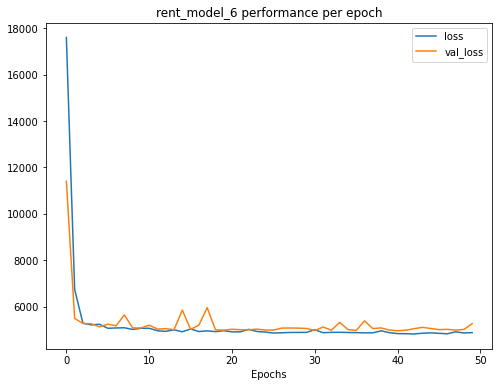

In [172]:
# Plot rent_history_6 training history
plot_training_history(history=rent_history_6, metrics_to_plot=["loss","val_loss"],  
                      plot_title="rent_model_6 performance per epoch",plot_size=(8,6))

history_df.head()
           loss           mae      val_loss       val_mae
0  18911.714844  18911.714844  13653.744141  13653.744141
1   9362.244141   9362.244141   5830.922363   5830.922363
2   5446.548340   5446.548340   5367.174805   5367.174805
3   5290.647949   5290.647949   5325.794434   5325.794434
4   5260.854980   5260.854980   5165.917969   5165.917969


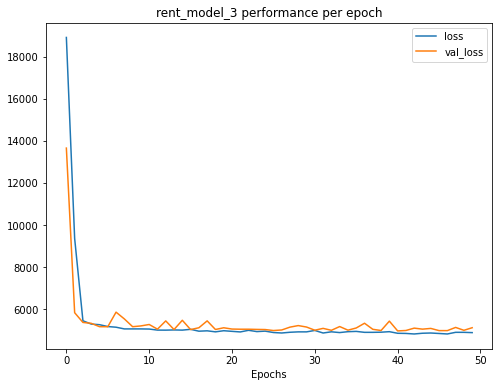

In [173]:
# Recalling the plot of rent_history_3 training history
plot_training_history(history=rent_history_3, metrics_to_plot=["loss","val_loss"],  
                      plot_title="rent_model_3 performance per epoch",plot_size=(8,6))

<span id="rent-experiment5-observation2"> </span>

**Observation (2):**  
`rent_model_3` and `rent_model_6` training results are not that much differents. Since `Huber` is a combination of `MAE` and `MSE`, it will be more resource consuming than directly using `MAE` as in [`rent_model_3`](#rent-experiment3)

<span id="rent-experiment5-conclusion"> </span>

**Experiment 5 conclusion:**      
From [observation 1](#rent-experiment5-observation1) and [observation 2](#rent-experiment5-observation2), we will continue to use [`rent_model_3`](#rent-experiment3) as our baseline model.
Before tweaking the model again, we will tweak the data that is fed to it by updating the column transformer pipeline: we will normalize the data that go through it

In [174]:
# Update experiment log
experiments_log["model_name"].append("rent_model_6")
experiments_log["model_summary"].append(rent_model_6.summary())
experiments_log["model_training_history"].append(rent_history_6.history)
experiments_log["model_training_epochs_count"].append(n_epochs)
experiments_log["model_checkpoint_path"].append(np.NaN)
experiments_log["training_objective"].append("Try improving rent_model_3 by using MSE and Huber as the loss functions.")

report="rent_model_3 and rent_model_6 performance are not far from each other. Since Huber, used as loss function in rent_model_6, is more resource consuming, we will continue to used rent_model_3 as the baseline model."
experiments_log["training_report"].append(report)  

experiments_log["training_recommendation"].append("Try improve the model by tweaking the data fed to it; More specific, update the column transformer: add normalization and standardization in the pipeline.")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               900       
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


<span id="rent-experiment3"></span>

### Experiment 6
* Same model as in [experiment 3](#rent-experiment3)
* Try improving it by tweaking the data fed to it: add normalization, then normalization, then the two, in the column transformer pipeline

**Objective**: Try to improving model built on [experiment 3](#rent-experiment3) by adding normalization, then normalization, then the two, in the column transformer pipeline

In [175]:
# Create a new column transformer: data normalization is added to the pipeline
rent_column_transformer_2 = make_column_transformer(
     # The features indicated in the list below are those that will be rescaled at this stage of the preprocessing
    ( MinMaxScaler(feature_range=(0,1)),["area", "num_bath_rooms", "num_bed_rooms", "expendable_amenity_count", 
                                         "unclassify_amenity_count"] ),
    
    # StandardScaler # Normalizer()
    # The features indicated in the list below are those that will be normalized at this stage of the preprocessing
    ( Normalizer(), ["area", "num_bath_rooms", "num_bed_rooms", "expendable_amenity_count", "unclassify_amenity_count"]),
    
    ( StandardScaler(), ["area", "num_bath_rooms", "num_bed_rooms", "expendable_amenity_count", "unclassify_amenity_count"]),
    
    # handle_unknown="ignore" (in the below code) will make the OneHotEncoder() ignore any column it doesn't know about
    (OneHotEncoder(handle_unknown="ignore"), ["building_type"]), # ["building_type","locality"]
    #(LabelEncoder(), ["locality"])
    
)

rent_column_transformer_2

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('normalizer', Normalizer(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('standardscaler', StandardScaler(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['building_type'])])

Now we will fit the column transformer to the training data.        
*🔑  Whenever we have a column transformer, we need to fit it the training data and then use that fit column transformer to transform the test data.*

In [176]:
# Fit the column transformer to the training data
rent_column_transformer_2.fit(rent_X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('normalizer', Normalizer(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('standardscaler', StandardScaler(),
                                 ['area', 'num_bath_rooms', 'num_bed_rooms',
                                  'expendable_amenity_count',
                                  'unclassify_amenity_count']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['building_type'])])

In [177]:
# Save the column transformer in a file (with pickle)

# TODO: write the code here

Now we will take what was learned from the training data by the column transformer to transform the training and testing data.

In [178]:
# Transform train set with column transformer
rent_X_train_normal2 = rent_column_transformer_2.transform(rent_X_train)
rent_X_train_normal2[:3]

array([[ 4.08163265e-01,  3.33333333e-01,  3.33333333e-01,
         0.00000000e+00,  0.00000000e+00,  9.99996000e-01,
         1.99999200e-03,  1.99999200e-03,  0.00000000e+00,
         0.00000000e+00, -2.50031323e-01, -5.64388935e-01,
        -7.55881860e-01, -3.36787952e-02, -7.42590464e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.89795918e-01,  0.00000000e+00,  6.66666667e-01,
         0.00000000e+00,  0.00000000e+00,  9.99996528e-01,
         8.33330440e-04,  2.49999132e-03,  0.00000000e+00,
         0.00000000e+00,  1.22988781e-01, -1.70650933e+00,
         6.17500728e-01, -3.36787952e-02, -7.42590464e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.07106781e-01,  7.07106781e-01,  0.00000000e+00,
         0.00000000e+00, -2.11513184e+00, -1.70650933e+00,
        -2.12926445e+00, -3.36787952e-02, -7.42590464e

In [179]:
rent_X_train_normal2.shape

(6848, 18)

In [180]:
# Transform testing set with column transformer
rent_X_test_normal2 = rent_column_transformer_2.transform(rent_X_test)
rent_X_test_normal2[:3]

array([[ 3.67346939e-01,  0.00000000e+00,  3.33333333e-01,
         0.00000000e+00,  0.00000000e+00,  9.99996914e-01,
         1.11110768e-03,  2.22221536e-03,  0.00000000e+00,
         0.00000000e+00, -4.36541375e-01, -1.70650933e+00,
        -7.55881860e-01, -3.36787952e-02, -7.42590464e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.57142857e-01,  6.66666667e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.99997166e-01,
         1.42856738e-03,  1.90475651e-03,  0.00000000e+00,
         0.00000000e+00,  1.80157925e+00,  5.77731463e-01,
         1.99088332e+00, -3.36787952e-02, -7.42590464e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.63265306e-01,  3.33333333e-01,  3.33333333e-01,
         0.00000000e+00,  0.00000000e+00,  9.99975001e-01,
         4.99987500e-03,  4.99987500e-03,  0.00000000e+00,
         0.00000000e+00, -1.36909164e+00, -5.64388935e-01,
        -7.55881860e-01, -3.36787952e-02, -7.42590464e

In [181]:
# tf.expand_dims(rent_X_test_normal, axis=rent_X_test_normal.shape[0])

In [182]:
# Build model to predict properties on rent prices

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
rent_model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.exponential)
])

# 2. Compile the model
rent_model_7.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=50
rent_history_7 = rent_model_7.fit(rent_X_test_normal2, rent_y_train,
                                  validation_split=.15, shuffle=True,
                                  epochs=n_epochs, verbose=1)

Epoch 1/50
33/33 [==============================] - 1s 6ms/step - loss: 22045.3535 - mae: 22045.3535 - val_loss: 20883.2480 - val_mae: 20883.2480
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 21916.7793 - mae: 21916.7793 - val_loss: 19891.5645 - val_mae: 19891.5645
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 20405.1738 - mae: 20405.1738 - val_loss: 17386.2695 - val_mae: 17386.2695
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 12819.5293 - mae: 12819.5293 - val_loss: 8811.0645 - val_mae: 8811.0645
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 9991.5918 - mae: 9991.5918 - val_loss: 10025.2871 - val_mae: 10025.2871
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 9927.3799 - mae: 9927.3799 - val_loss: 8309.1035 - val_mae: 8309.1035
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 9796.5293 - mae: 9796.5293 - val_loss: 9730.5264 - val_mae: 

In [183]:
# Predict on unseen data during training
rent_y_pred_7 = rent_model_7.predict(rent_X_test_normal2)
rent_y_pred_7[:5]

38/38 [==============================] - 0s 2ms/step


array([[18334.727],
       [15049.493],
       [17181.521],
       [17436.402],
       [17263.432]], dtype=float32)

In [184]:
# rent_model_7 MAE
rent_mae_7 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_7))
rent_mae_7   

<tf.Tensor: shape=(), dtype=float32, numpy=9432.928>

In [185]:
# Recalling rent_model_3 MAE
rent_mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=4795.2744>

<span id="rent-experiment6-observation1"> </span>

**Observation (1):**  
After adding normalization and standardization to the pipeline, `rent_model_7` has a much higher MAE than `rent_model_3`.
The MAE of `rent_model_7` was also higher when we try adding only either of normalization or standardization to the pipeline.

history_df.head()
           loss           mae      val_loss       val_mae
0  22045.353516  22045.353516  20883.248047  20883.248047
1  21916.779297  21916.779297  19891.564453  19891.564453
2  20405.173828  20405.173828  17386.269531  17386.269531
3  12819.529297  12819.529297   8811.064453   8811.064453
4   9991.591797   9991.591797  10025.287109  10025.287109


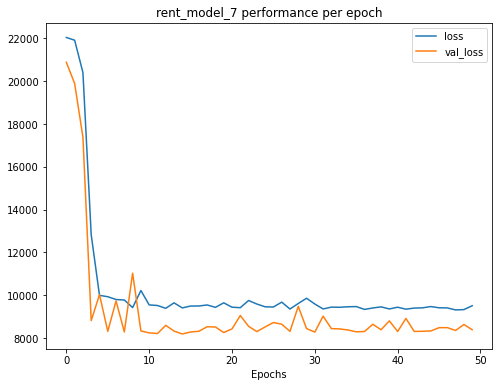

In [186]:
# Plot rent_history_7 training history
plot_training_history(history=rent_history_7, metrics_to_plot=["loss","val_loss"],  
                      plot_title="rent_model_7 performance per epoch",plot_size=(8,6))

history_df.head()
           loss           mae      val_loss       val_mae
0  18911.714844  18911.714844  13653.744141  13653.744141
1   9362.244141   9362.244141   5830.922363   5830.922363
2   5446.548340   5446.548340   5367.174805   5367.174805
3   5290.647949   5290.647949   5325.794434   5325.794434
4   5260.854980   5260.854980   5165.917969   5165.917969


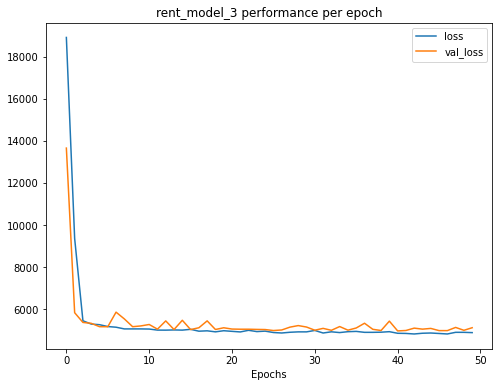

In [187]:
# Plot rent_history_3 training history
plot_training_history(history=rent_history_3, metrics_to_plot=["loss","val_loss"],  
                      plot_title="rent_model_3 performance per epoch",plot_size=(8,6))

<span id="rent-experiment6-observation2"> </span>

**Observation (2):**  
`rent_model_3` has a better improvement in training than `rent_model_7` (which has normalization and standardization added to its pipeline).
That observation was the same when we try adding only either of normalization or standardization to the pipeline.

<span id="rent-experiment6-conclusion"> </span>

**Experiment 6 conclusion:**      
From [observation 1](#rent-experiment6-observation1) and [observation 2](#rent-experiment6-observation2), we can conclude that adding Normalizer, or StandardScaler, or the two, to the column transformer pipeline is not helping the model learn faster.    


In [188]:
# Update experiment log
experiments_log["model_name"].append("rent_model_7")
experiments_log["model_summary"].append(rent_model_7.summary())
experiments_log["model_training_history"].append(rent_history_7.history)
experiments_log["model_training_epochs_count"].append(n_epochs)
experiments_log["model_checkpoint_path"].append(np.NaN)
experiments_log["training_objective"].append("Try improving rent_model_3 by tweaking the data fed to it: Normalizer, then StandardScaler, then the two, should be added to the column transformer pipeline.")

report="rent_model_7 performance is not good at all compared to rent_model_3 performance. So we will continue to used rent_model_3 as the baseline model."
experiments_log["training_report"].append(report)  

experiments_log["training_recommendation"].append("Try improve rent_model_3 by giving it more layers (and neurons)")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1900      
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,921
Trainable params: 2,921
Non-trainable params: 0
_________________________________________________________________


<span id="rent-experiment7"></span>

### Experiment 7
* Try improving model in [experiment 3](#rent-experiment3) by giving it more layers and more neurons
* Train for longer (500 epochs)

**Objective**: Try improving model built on [experiment 3](#rent-experiment3) by adding more layers and neurons

In [189]:
# Build model to predict properties on rent prices

# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
rent_model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(800, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(500, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.exponential)
])

# 2. Compile the model
rent_model_8.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=550
rent_history_8 = rent_model_8.fit(rent_X_test_normal, rent_y_train,
                                 validation_split=.15, shuffle=True,
                                 epochs=n_epochs, verbose=1)

Epoch 1/550
33/33 [==============================] - 1s 21ms/step - loss: 22037.1191 - mae: 22037.1191 - val_loss: 20830.1836 - val_mae: 20830.1836
Epoch 2/550
33/33 [==============================] - 0s 15ms/step - loss: 23240.3125 - mae: 23240.3125 - val_loss: 20888.4414 - val_mae: 20888.4414
Epoch 3/550
33/33 [==============================] - 1s 16ms/step - loss: 24650.4688 - mae: 24650.4688 - val_loss: 20887.8242 - val_mae: 20887.8242
Epoch 4/550
33/33 [==============================] - 1s 15ms/step - loss: 34066.6484 - mae: 34066.6484 - val_loss: 20887.7793 - val_mae: 20887.7793
Epoch 5/550
33/33 [==============================] - 1s 19ms/step - loss: 21415.9863 - mae: 21415.9863 - val_loss: 28050.6484 - val_mae: 28050.6484
Epoch 6/550
33/33 [==============================] - 0s 14ms/step - loss: 21799.5449 - mae: 21799.5449 - val_loss: 20758.5781 - val_mae: 20758.5781
Epoch 7/550
33/33 [==============================] - 1s 17ms/step - loss: 21459.0273 - mae: 21459.0273 - val_los

33/33 [==============================] - 1s 19ms/step - loss: 10891.7197 - mae: 10891.7197 - val_loss: 12194.6836 - val_mae: 12194.6836
Epoch 57/550
33/33 [==============================] - 1s 19ms/step - loss: 12300.8008 - mae: 12300.8008 - val_loss: 8761.4180 - val_mae: 8761.4180
Epoch 58/550
33/33 [==============================] - 1s 17ms/step - loss: 9642.3398 - mae: 9642.3398 - val_loss: 9040.6631 - val_mae: 9040.6631
Epoch 59/550
33/33 [==============================] - 1s 18ms/step - loss: 10314.0947 - mae: 10314.0947 - val_loss: 8480.5781 - val_mae: 8480.5791
Epoch 60/550
33/33 [==============================] - 1s 18ms/step - loss: 9506.6387 - mae: 9506.6387 - val_loss: 9054.3975 - val_mae: 9054.3975
Epoch 61/550
33/33 [==============================] - 1s 20ms/step - loss: 9877.1533 - mae: 9877.1533 - val_loss: 8529.3320 - val_mae: 8529.3320
Epoch 62/550
33/33 [==============================] - 1s 20ms/step - loss: 9584.2529 - mae: 9584.2529 - val_loss: 9457.1230 - val_mae: 

33/33 [==============================] - 1s 20ms/step - loss: 10288.0342 - mae: 10288.0342 - val_loss: 10530.0244 - val_mae: 10530.0244
Epoch 113/550
33/33 [==============================] - 1s 20ms/step - loss: 9964.0225 - mae: 9964.0225 - val_loss: 9402.7119 - val_mae: 9402.7119
Epoch 114/550
33/33 [==============================] - 1s 19ms/step - loss: 10908.6572 - mae: 10908.6572 - val_loss: 8607.1904 - val_mae: 8607.1904
Epoch 115/550
33/33 [==============================] - 1s 19ms/step - loss: 9444.3906 - mae: 9444.3906 - val_loss: 8696.3115 - val_mae: 8696.3115
Epoch 116/550
33/33 [==============================] - 1s 18ms/step - loss: 9928.9580 - mae: 9928.9580 - val_loss: 8533.4990 - val_mae: 8533.4990
Epoch 117/550
33/33 [==============================] - 1s 19ms/step - loss: 9829.8281 - mae: 9829.8281 - val_loss: 8360.2021 - val_mae: 8360.2021
Epoch 118/550
33/33 [==============================] - 1s 19ms/step - loss: 9492.8672 - mae: 9492.8672 - val_loss: 8470.9053 - val_m

Epoch 168/550
33/33 [==============================] - 1s 20ms/step - loss: 10205.3096 - mae: 10205.3096 - val_loss: 8434.7637 - val_mae: 8434.7637
Epoch 169/550
33/33 [==============================] - 1s 21ms/step - loss: 9380.5645 - mae: 9380.5645 - val_loss: 8516.6250 - val_mae: 8516.6250
Epoch 170/550
33/33 [==============================] - 1s 21ms/step - loss: 9404.3574 - mae: 9404.3574 - val_loss: 10004.6992 - val_mae: 10004.6992
Epoch 171/550
33/33 [==============================] - 1s 21ms/step - loss: 9678.3096 - mae: 9678.3096 - val_loss: 10655.7861 - val_mae: 10655.7861
Epoch 172/550
33/33 [==============================] - 1s 21ms/step - loss: 10008.1943 - mae: 10008.1943 - val_loss: 8604.6396 - val_mae: 8604.6396
Epoch 173/550
33/33 [==============================] - 1s 21ms/step - loss: 9864.7822 - mae: 9864.7822 - val_loss: 8664.5918 - val_mae: 8664.5918
Epoch 174/550
33/33 [==============================] - 1s 20ms/step - loss: 9451.1914 - mae: 9451.1914 - val_loss: 8

Epoch 224/550
33/33 [==============================] - 1s 18ms/step - loss: 9641.9580 - mae: 9641.9580 - val_loss: 10401.9131 - val_mae: 10401.9131
Epoch 225/550
33/33 [==============================] - 1s 22ms/step - loss: 9785.0244 - mae: 9785.0244 - val_loss: 8345.0889 - val_mae: 8345.0889
Epoch 226/550
33/33 [==============================] - 1s 21ms/step - loss: 9502.3008 - mae: 9502.3008 - val_loss: 8788.2441 - val_mae: 8788.2441
Epoch 227/550
33/33 [==============================] - 1s 22ms/step - loss: 9962.6748 - mae: 9962.6748 - val_loss: 8322.7100 - val_mae: 8322.7100
Epoch 228/550
33/33 [==============================] - 1s 26ms/step - loss: 9356.6318 - mae: 9356.6318 - val_loss: 8770.8857 - val_mae: 8770.8857
Epoch 229/550
33/33 [==============================] - 1s 24ms/step - loss: 9419.1719 - mae: 9419.1719 - val_loss: 8258.9131 - val_mae: 8258.9131
Epoch 230/550
33/33 [==============================] - 1s 23ms/step - loss: 9752.8848 - mae: 9752.8848 - val_loss: 8595.70

Epoch 280/550
33/33 [==============================] - 1s 19ms/step - loss: 9571.6182 - mae: 9571.6182 - val_loss: 8839.2305 - val_mae: 8839.2305
Epoch 281/550
33/33 [==============================] - 1s 20ms/step - loss: 9890.2568 - mae: 9890.2568 - val_loss: 11336.5830 - val_mae: 11336.5830
Epoch 282/550
33/33 [==============================] - 1s 20ms/step - loss: 10108.0117 - mae: 10108.0117 - val_loss: 9844.8242 - val_mae: 9844.8242
Epoch 283/550
33/33 [==============================] - 1s 20ms/step - loss: 9642.2490 - mae: 9642.2490 - val_loss: 9209.2354 - val_mae: 9209.2354
Epoch 284/550
33/33 [==============================] - 1s 19ms/step - loss: 9526.8301 - mae: 9526.8301 - val_loss: 8386.3926 - val_mae: 8386.3926
Epoch 285/550
33/33 [==============================] - 1s 20ms/step - loss: 9448.9639 - mae: 9448.9639 - val_loss: 8951.5479 - val_mae: 8951.5479
Epoch 286/550
33/33 [==============================] - 1s 20ms/step - loss: 9931.5420 - mae: 9931.5420 - val_loss: 12132

Epoch 336/550
33/33 [==============================] - 1s 21ms/step - loss: 9605.1572 - mae: 9605.1572 - val_loss: 8731.6123 - val_mae: 8731.6123
Epoch 337/550
33/33 [==============================] - 1s 21ms/step - loss: 9872.2363 - mae: 9872.2363 - val_loss: 10494.2559 - val_mae: 10494.2559
Epoch 338/550
33/33 [==============================] - 1s 19ms/step - loss: 10172.0645 - mae: 10172.0645 - val_loss: 8988.9707 - val_mae: 8988.9707
Epoch 339/550
33/33 [==============================] - 1s 20ms/step - loss: 9484.6904 - mae: 9484.6904 - val_loss: 8349.5547 - val_mae: 8349.5547
Epoch 340/550
33/33 [==============================] - 1s 21ms/step - loss: 9352.4189 - mae: 9352.4189 - val_loss: 8514.5645 - val_mae: 8514.5645
Epoch 341/550
33/33 [==============================] - 1s 22ms/step - loss: 9858.9355 - mae: 9858.9355 - val_loss: 17411.2109 - val_mae: 17411.2109
Epoch 342/550
33/33 [==============================] - 1s 20ms/step - loss: 12888.0625 - mae: 12888.0625 - val_loss: 9

Epoch 392/550
33/33 [==============================] - 1s 20ms/step - loss: 9626.9688 - mae: 9626.9688 - val_loss: 9998.6660 - val_mae: 9998.6660
Epoch 393/550
33/33 [==============================] - 1s 18ms/step - loss: 9814.3516 - mae: 9814.3516 - val_loss: 9223.1543 - val_mae: 9223.1543
Epoch 394/550
33/33 [==============================] - 1s 24ms/step - loss: 9608.1807 - mae: 9608.1807 - val_loss: 8804.1113 - val_mae: 8804.1113
Epoch 395/550
33/33 [==============================] - 1s 22ms/step - loss: 9271.0322 - mae: 9271.0322 - val_loss: 10392.7803 - val_mae: 10392.7803
Epoch 396/550
33/33 [==============================] - 1s 20ms/step - loss: 10243.5264 - mae: 10243.5264 - val_loss: 8394.5908 - val_mae: 8394.5908
Epoch 397/550
33/33 [==============================] - 1s 20ms/step - loss: 9376.4434 - mae: 9376.4434 - val_loss: 8368.0430 - val_mae: 8368.0430
Epoch 398/550
33/33 [==============================] - 1s 21ms/step - loss: 9333.0781 - mae: 9333.0781 - val_loss: 9399.

33/33 [==============================] - 1s 21ms/step - loss: 9814.0918 - mae: 9814.0918 - val_loss: 8471.9512 - val_mae: 8471.9512
Epoch 449/550
33/33 [==============================] - 1s 21ms/step - loss: 9661.9199 - mae: 9661.9199 - val_loss: 8977.7158 - val_mae: 8977.7158
Epoch 450/550
33/33 [==============================] - 1s 21ms/step - loss: 9796.5264 - mae: 9796.5264 - val_loss: 9194.3379 - val_mae: 9194.3379
Epoch 451/550
33/33 [==============================] - 1s 20ms/step - loss: 9727.0605 - mae: 9727.0605 - val_loss: 9858.5527 - val_mae: 9858.5527
Epoch 452/550
33/33 [==============================] - 1s 22ms/step - loss: 9413.1953 - mae: 9413.1953 - val_loss: 9263.1074 - val_mae: 9263.1074
Epoch 453/550
33/33 [==============================] - 1s 20ms/step - loss: 10609.7676 - mae: 10609.7676 - val_loss: 10848.8623 - val_mae: 10848.8623
Epoch 454/550
33/33 [==============================] - 1s 21ms/step - loss: 9968.7031 - mae: 9968.7031 - val_loss: 8289.5137 - val_mae

33/33 [==============================] - 1s 22ms/step - loss: 10043.7031 - mae: 10043.7031 - val_loss: 8563.3271 - val_mae: 8563.3271
Epoch 505/550
33/33 [==============================] - 1s 21ms/step - loss: 9967.1289 - mae: 9967.1289 - val_loss: 8423.1230 - val_mae: 8423.1230
Epoch 506/550
33/33 [==============================] - 1s 21ms/step - loss: 9273.1152 - mae: 9273.1152 - val_loss: 8593.2070 - val_mae: 8593.2070
Epoch 507/550
33/33 [==============================] - 1s 22ms/step - loss: 9377.0430 - mae: 9377.0430 - val_loss: 8982.2393 - val_mae: 8982.2393
Epoch 508/550
33/33 [==============================] - 1s 20ms/step - loss: 9783.3506 - mae: 9783.3506 - val_loss: 8702.5186 - val_mae: 8702.5186
Epoch 509/550
33/33 [==============================] - 1s 22ms/step - loss: 9707.6025 - mae: 9707.6025 - val_loss: 8383.6689 - val_mae: 8383.6689
Epoch 510/550
33/33 [==============================] - 1s 24ms/step - loss: 9362.1641 - mae: 9362.1641 - val_loss: 8525.7354 - val_mae: 

In [190]:
# Predict on unseen data during training
rent_y_pred_8 = rent_model_8.predict(rent_X_test_normal)
rent_y_pred_8[:5]

38/38 [==============================] - 0s 4ms/step


array([[15126.2  ],
       [14390.501],
       [16247.556],
       [15326.222],
       [15003.808]], dtype=float32)

In [191]:
# rent_model_8 MAE
rent_mae_8 = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_8))
rent_mae_8   

<tf.Tensor: shape=(), dtype=float32, numpy=10110.503>

In [192]:
# Recalling rent_model_3 MAE
rent_mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=4795.2744>

<span id="rent-experiment7-observation1"> </span>

**Observation (1):**  
`rent_model_8` is not providing a good result after 550 epochs of training. We will assume that it is because it is a larger model than `rent_model_3`; so let us try to fine tune it and see if we can improve its performance.

history_df.head()
           loss           mae      val_loss       val_mae
0  22037.119141  22037.119141  20830.183594  20830.183594
1  23240.312500  23240.312500  20888.441406  20888.441406
2  24650.468750  24650.468750  20887.824219  20887.824219
3  34066.648438  34066.648438  20887.779297  20887.779297
4  21415.986328  21415.986328  28050.648438  28050.648438


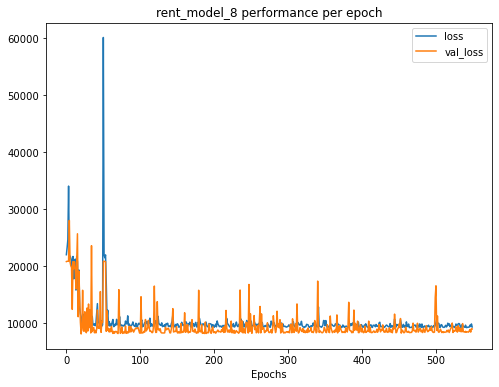

In [193]:
# Plot rent_history_8 training history
plot_training_history(history=rent_history_8, metrics_to_plot=["loss","val_loss"],  
                      plot_title="rent_model_8 performance per epoch",plot_size=(8,6))

<span id="rent-experiment7-observation2"> </span>

**Observation (2):**  
Looking at the plot above, we can deduce that the next step to try improving`rent_model_8` is to find its ideal learning rate.

<span id="rent-experiment8"></span>

### Experiment 8
* Try improving models in [experiment 3](#rent-experiment3) and [experiment 7](#rent-experiment7) by finding their ideal learning rate
* Train each of them for longer (1500 epochs for model in [experiment 7](#rent-experiment7) and 500 epochs for model in [experiment 3](#rent-experiment3))

**Objective**: Try improving models built in [experiment 3](#rent-experiment3) and [experiment 7](#rent-experiment7) by finding their ideal learning rate and training them for longer

In [ ]:
# TODO : write the code for the experiment 8

In [201]:
# Build model to predict properties on rent prices

# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
rent_model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(800, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(500, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
rent_model_b.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
n_epochs=550
rent_history_b = rent_model_b.fit(rent_X_test_normal, rent_y_train,
                                 validation_split=.15, shuffle=True,
                                 epochs=n_epochs, verbose=1)

Epoch 1/550
33/33 [==============================] - 1s 20ms/step - loss: 18597.5898 - mae: 18597.5898 - val_loss: 9564.6211 - val_mae: 9564.6211
Epoch 2/550
33/33 [==============================] - 1s 17ms/step - loss: 9943.3262 - mae: 9943.3262 - val_loss: 8289.4766 - val_mae: 8289.4766
Epoch 3/550
33/33 [==============================] - 1s 17ms/step - loss: 9524.3789 - mae: 9524.3789 - val_loss: 8445.7881 - val_mae: 8445.7881
Epoch 4/550
33/33 [==============================] - 1s 16ms/step - loss: 9622.3877 - mae: 9622.3877 - val_loss: 8550.6865 - val_mae: 8550.6865
Epoch 5/550
33/33 [==============================] - 1s 17ms/step - loss: 9450.8740 - mae: 9450.8740 - val_loss: 8541.0723 - val_mae: 8541.0723
Epoch 6/550
33/33 [==============================] - 1s 18ms/step - loss: 9342.1055 - mae: 9342.1055 - val_loss: 8095.2905 - val_mae: 8095.2905
Epoch 7/550
33/33 [==============================] - 1s 20ms/step - loss: 9451.2559 - mae: 9451.2559 - val_loss: 8564.2295 - val_mae: 

33/33 [==============================] - 1s 25ms/step - loss: 9290.3008 - mae: 9290.3008 - val_loss: 8280.8711 - val_mae: 8280.8711
Epoch 58/550
33/33 [==============================] - 1s 24ms/step - loss: 9669.3105 - mae: 9669.3105 - val_loss: 9007.8555 - val_mae: 9007.8555
Epoch 59/550
33/33 [==============================] - 1s 21ms/step - loss: 9622.4355 - mae: 9622.4355 - val_loss: 8177.7554 - val_mae: 8177.7554
Epoch 60/550
33/33 [==============================] - 1s 20ms/step - loss: 9457.9131 - mae: 9457.9131 - val_loss: 8611.4805 - val_mae: 8611.4805
Epoch 61/550
33/33 [==============================] - 1s 21ms/step - loss: 9574.5039 - mae: 9574.5039 - val_loss: 8524.3682 - val_mae: 8524.3682
Epoch 62/550
33/33 [==============================] - 1s 22ms/step - loss: 9269.8184 - mae: 9269.8184 - val_loss: 8257.8604 - val_mae: 8257.8604
Epoch 63/550
33/33 [==============================] - 1s 23ms/step - loss: 9306.5332 - mae: 9306.5332 - val_loss: 8215.5166 - val_mae: 8215.516

33/33 [==============================] - 1s 22ms/step - loss: 9241.1895 - mae: 9241.1895 - val_loss: 8462.2832 - val_mae: 8462.2832
Epoch 114/550
33/33 [==============================] - 1s 20ms/step - loss: 9543.3242 - mae: 9543.3242 - val_loss: 9147.0381 - val_mae: 9147.0381
Epoch 115/550
33/33 [==============================] - 1s 19ms/step - loss: 9360.6992 - mae: 9360.6992 - val_loss: 8286.5459 - val_mae: 8286.5459
Epoch 116/550
33/33 [==============================] - 1s 22ms/step - loss: 9335.8193 - mae: 9335.8193 - val_loss: 8257.5381 - val_mae: 8257.5381
Epoch 117/550
33/33 [==============================] - 1s 21ms/step - loss: 9233.9619 - mae: 9233.9619 - val_loss: 8363.6006 - val_mae: 8363.6006
Epoch 118/550
33/33 [==============================] - 1s 30ms/step - loss: 9537.6455 - mae: 9537.6455 - val_loss: 8248.5684 - val_mae: 8248.5684
Epoch 119/550
33/33 [==============================] - 1s 31ms/step - loss: 9302.7080 - mae: 9302.7080 - val_loss: 8394.6631 - val_mae: 83

33/33 [==============================] - 1s 28ms/step - loss: 9258.3633 - mae: 9258.3633 - val_loss: 8724.3711 - val_mae: 8724.3711
Epoch 170/550
33/33 [==============================] - 1s 26ms/step - loss: 9522.1367 - mae: 9522.1367 - val_loss: 8788.3135 - val_mae: 8788.3135
Epoch 171/550
33/33 [==============================] - 1s 26ms/step - loss: 9337.5635 - mae: 9337.5635 - val_loss: 8499.8447 - val_mae: 8499.8447
Epoch 172/550
33/33 [==============================] - 1s 23ms/step - loss: 9259.6133 - mae: 9259.6133 - val_loss: 8729.7041 - val_mae: 8729.7041
Epoch 173/550
33/33 [==============================] - 1s 23ms/step - loss: 9222.0830 - mae: 9222.0830 - val_loss: 8307.3857 - val_mae: 8307.3857
Epoch 174/550
33/33 [==============================] - 1s 26ms/step - loss: 9306.4521 - mae: 9306.4521 - val_loss: 8367.3115 - val_mae: 8367.3115
Epoch 175/550
33/33 [==============================] - 1s 25ms/step - loss: 9249.5664 - mae: 9249.5664 - val_loss: 8484.5986 - val_mae: 84

33/33 [==============================] - 1s 19ms/step - loss: 9321.5088 - mae: 9321.5088 - val_loss: 8302.4736 - val_mae: 8302.4736
Epoch 226/550
33/33 [==============================] - 1s 20ms/step - loss: 9330.3730 - mae: 9330.3730 - val_loss: 8901.6680 - val_mae: 8901.6680
Epoch 227/550
33/33 [==============================] - 1s 23ms/step - loss: 9310.0107 - mae: 9310.0107 - val_loss: 8618.9766 - val_mae: 8618.9766
Epoch 228/550
33/33 [==============================] - 1s 20ms/step - loss: 9294.9590 - mae: 9294.9590 - val_loss: 8303.7441 - val_mae: 8303.7441
Epoch 229/550
33/33 [==============================] - 1s 22ms/step - loss: 9308.0781 - mae: 9308.0781 - val_loss: 8285.2070 - val_mae: 8285.2070
Epoch 230/550
33/33 [==============================] - 1s 23ms/step - loss: 9237.4316 - mae: 9237.4316 - val_loss: 8461.0234 - val_mae: 8461.0234
Epoch 231/550
33/33 [==============================] - 1s 22ms/step - loss: 9611.8066 - mae: 9611.8066 - val_loss: 8390.6943 - val_mae: 83

33/33 [==============================] - 1s 26ms/step - loss: 9283.6562 - mae: 9283.6562 - val_loss: 8369.1270 - val_mae: 8369.1270
Epoch 282/550
33/33 [==============================] - 1s 23ms/step - loss: 9240.9111 - mae: 9240.9111 - val_loss: 8586.3379 - val_mae: 8586.3379
Epoch 283/550
33/33 [==============================] - 1s 22ms/step - loss: 9240.0195 - mae: 9240.0195 - val_loss: 8298.6582 - val_mae: 8298.6582
Epoch 284/550
33/33 [==============================] - 1s 23ms/step - loss: 9297.1221 - mae: 9297.1221 - val_loss: 8327.4043 - val_mae: 8327.4043
Epoch 285/550
33/33 [==============================] - 1s 22ms/step - loss: 9306.2344 - mae: 9306.2344 - val_loss: 8289.9316 - val_mae: 8289.9316
Epoch 286/550
33/33 [==============================] - 1s 24ms/step - loss: 9183.8174 - mae: 9183.8174 - val_loss: 8581.5859 - val_mae: 8581.5859
Epoch 287/550
33/33 [==============================] - 1s 22ms/step - loss: 9294.2930 - mae: 9294.2930 - val_loss: 8289.7549 - val_mae: 82

33/33 [==============================] - 1s 27ms/step - loss: 9270.3223 - mae: 9270.3223 - val_loss: 8278.5059 - val_mae: 8278.5059
Epoch 338/550
33/33 [==============================] - 1s 25ms/step - loss: 9194.2559 - mae: 9194.2559 - val_loss: 8361.4961 - val_mae: 8361.4961
Epoch 339/550
33/33 [==============================] - 1s 24ms/step - loss: 9242.2900 - mae: 9242.2900 - val_loss: 8446.8418 - val_mae: 8446.8418
Epoch 340/550
33/33 [==============================] - 1s 25ms/step - loss: 9208.2070 - mae: 9208.2070 - val_loss: 8285.7588 - val_mae: 8285.7588
Epoch 341/550
33/33 [==============================] - 1s 22ms/step - loss: 9258.2324 - mae: 9258.2324 - val_loss: 8284.1367 - val_mae: 8284.1367
Epoch 342/550
33/33 [==============================] - 1s 26ms/step - loss: 9169.8877 - mae: 9169.8877 - val_loss: 8283.5479 - val_mae: 8283.5479
Epoch 343/550
33/33 [==============================] - 1s 26ms/step - loss: 9187.5479 - mae: 9187.5479 - val_loss: 8419.8799 - val_mae: 84

33/33 [==============================] - 1s 26ms/step - loss: 9221.5430 - mae: 9221.5430 - val_loss: 8391.8115 - val_mae: 8391.8115
Epoch 394/550
33/33 [==============================] - 1s 25ms/step - loss: 9190.3301 - mae: 9190.3301 - val_loss: 8306.5498 - val_mae: 8306.5498
Epoch 395/550
33/33 [==============================] - 1s 25ms/step - loss: 9183.6758 - mae: 9183.6758 - val_loss: 8349.8906 - val_mae: 8349.8906
Epoch 396/550
33/33 [==============================] - 1s 25ms/step - loss: 9237.3301 - mae: 9237.3301 - val_loss: 8321.7920 - val_mae: 8321.7920
Epoch 397/550
33/33 [==============================] - 1s 24ms/step - loss: 9261.9326 - mae: 9261.9326 - val_loss: 8320.2578 - val_mae: 8320.2578
Epoch 398/550
33/33 [==============================] - 1s 26ms/step - loss: 9366.4531 - mae: 9366.4531 - val_loss: 8332.6641 - val_mae: 8332.6641
Epoch 399/550
33/33 [==============================] - 1s 25ms/step - loss: 9489.0303 - mae: 9489.0303 - val_loss: 8457.9277 - val_mae: 84

33/33 [==============================] - 1s 23ms/step - loss: 9288.9150 - mae: 9288.9150 - val_loss: 8650.0820 - val_mae: 8650.0820
Epoch 450/550
33/33 [==============================] - 1s 22ms/step - loss: 9260.5518 - mae: 9260.5518 - val_loss: 8290.2627 - val_mae: 8290.2627
Epoch 451/550
33/33 [==============================] - 1s 22ms/step - loss: 9269.1357 - mae: 9269.1357 - val_loss: 8306.4873 - val_mae: 8306.4873
Epoch 452/550
33/33 [==============================] - 1s 21ms/step - loss: 9216.8760 - mae: 9216.8760 - val_loss: 8329.5596 - val_mae: 8329.5596
Epoch 453/550
33/33 [==============================] - 1s 22ms/step - loss: 9408.7910 - mae: 9408.7910 - val_loss: 8315.0273 - val_mae: 8315.0273
Epoch 454/550
33/33 [==============================] - 1s 22ms/step - loss: 9312.8643 - mae: 9312.8643 - val_loss: 8440.9531 - val_mae: 8440.9531
Epoch 455/550
33/33 [==============================] - 1s 21ms/step - loss: 9177.6973 - mae: 9177.6973 - val_loss: 8376.0469 - val_mae: 83

33/33 [==============================] - 1s 21ms/step - loss: 9260.6797 - mae: 9260.6797 - val_loss: 8301.5342 - val_mae: 8301.5342
Epoch 506/550
33/33 [==============================] - 1s 24ms/step - loss: 9191.8623 - mae: 9191.8623 - val_loss: 8316.3369 - val_mae: 8316.3369
Epoch 507/550
33/33 [==============================] - 1s 27ms/step - loss: 9130.0430 - mae: 9130.0430 - val_loss: 8290.1055 - val_mae: 8290.1064
Epoch 508/550
33/33 [==============================] - 1s 24ms/step - loss: 9155.8428 - mae: 9155.8428 - val_loss: 8398.9170 - val_mae: 8398.9170
Epoch 509/550
33/33 [==============================] - 1s 20ms/step - loss: 9287.8701 - mae: 9287.8701 - val_loss: 8273.4482 - val_mae: 8273.4482
Epoch 510/550
33/33 [==============================] - 1s 24ms/step - loss: 9151.0811 - mae: 9151.0811 - val_loss: 8275.5830 - val_mae: 8275.5830
Epoch 511/550
33/33 [==============================] - 1s 21ms/step - loss: 9135.1797 - mae: 9135.1797 - val_loss: 8392.2676 - val_mae: 83

In [202]:
# Predict on unseen data during training
rent_y_pred_b = rent_model_b.predict(rent_X_test_normal)
rent_y_pred_b[:5]

38/38 [==============================] - 0s 6ms/step


array([[18936.252],
       [16554.111],
       [18842.889],
       [18680.799],
       [18615.857]], dtype=float32)

In [203]:
# rent_model_8 MAE
rent_mae_b = mae(y_true=rent_y_test, y_pred=tf.squeeze(rent_y_pred_b))
rent_mae_b   

<tf.Tensor: shape=(), dtype=float32, numpy=9799.022>

**Experiments global report:**        
Are confirmed so far:
* [`rent_model_3`](#rent-experiment3) is the better performing model so far, so it should be used as the baseline model
* use Adam optimizer
* Use MAE for the loss
* use exponential activation on the last layer (instead of linear, softmax or relu)
* use data coming from rent_column_transformer_1

**To experiment on:**
* find the ideal learning rate
* increase the number of layers
* increase the number of neurons per layer
* try updating the current column transformer: insert in its pipeline Normalizer, then StandardScaler, then the two, and see the result of each one
* try other activation functions on the last layer
* try selu activation function in the hidden layer

**Experimented on:**
* Used Huber for the loss function
* Tried SGD optimizer
